# **Unsupervised Learning Practice Project: Fantasy Sports Clustering Analysis**

--------------------------------
## **Context** 
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Complete the code to import the data
data = pd.read_csv('fpl_data.csv')

In [5]:
# Check the shape of the data
data.shape

(476, 13)

In [6]:
# Let's view a sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [7]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [14]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [15]:
# Check for duplicate values
num_duplicados = df.duplicated().sum()
print(num_duplicados)

0


In [16]:
# Check for missing values in the data
num_valores_perdidos = df.isna().sum()
print(num_valores_perdidos)

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64


## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


**Observations and Insights: 
- En la variable Goals_Scored en promedio, los jugadores anotan alrededor de 4 goles durante la temporada, con un valor máximo de 23 goles. Sin embargo, el valor del percentil 75% para esta variable es solo de 2 goles, lo que sugiere que la mayoría de los jugadores anotan relativamente pocos goles.

- La media de asistencias es 1.75, lo que sugiere que en promedio los jugadores proporcionan casi dos pases para que sus compañeros marquen goles. La desviación estándar de 2.71 indica que hay una gran variabilidad en el número de asistencias que los jugadores realizan en el transcurso de la temporada.
**

### **Univariate Analysis**

In [18]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**`Goals_Scored`**

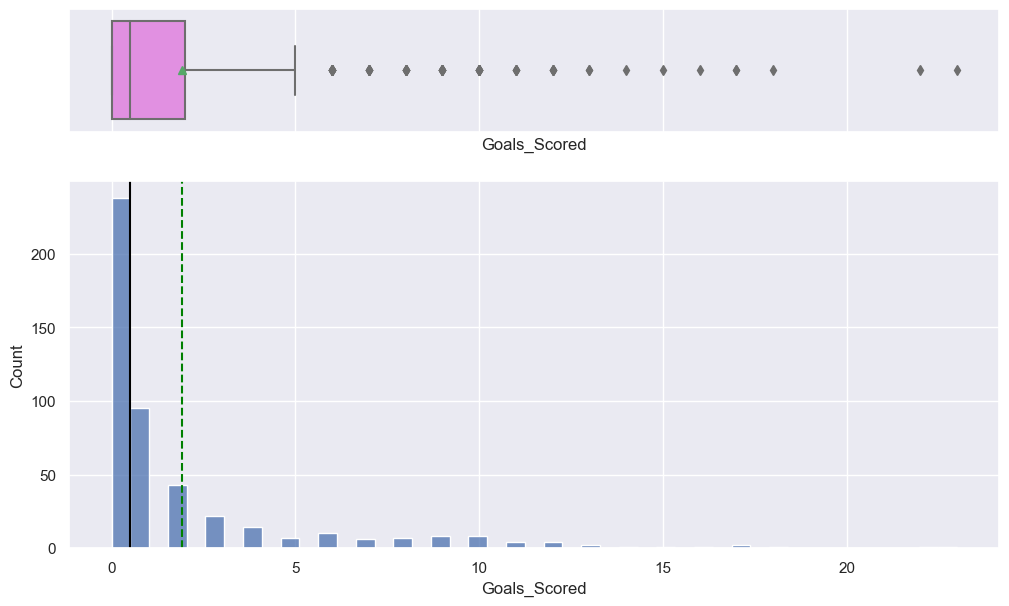

In [19]:
histogram_boxplot(df, 'Goals_Scored')

**`Assists`**

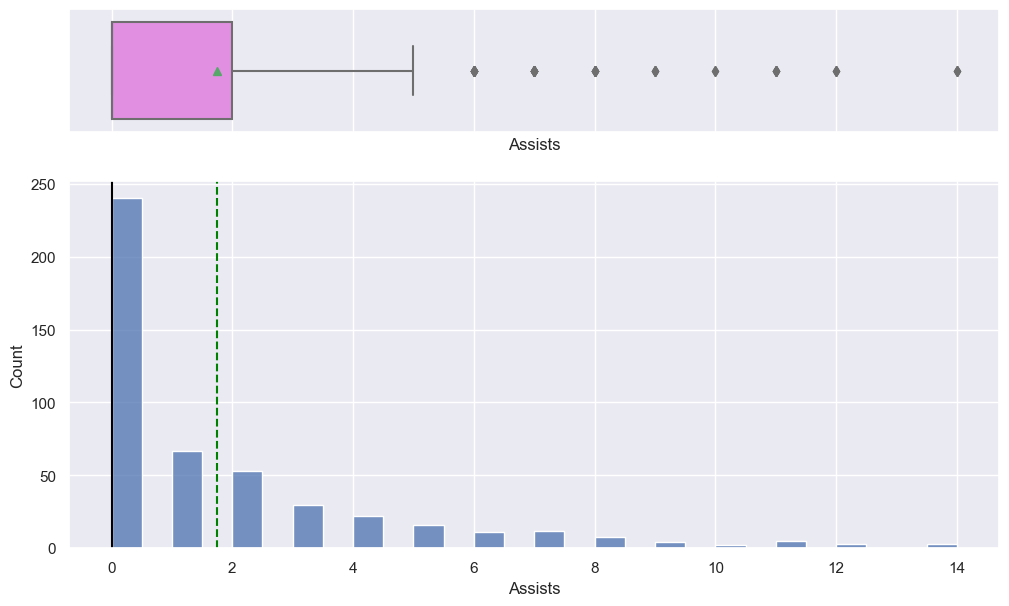

In [20]:
histogram_boxplot(df, 'Assists')  # Complete the code to create histogram_boxplot for 'Assists'

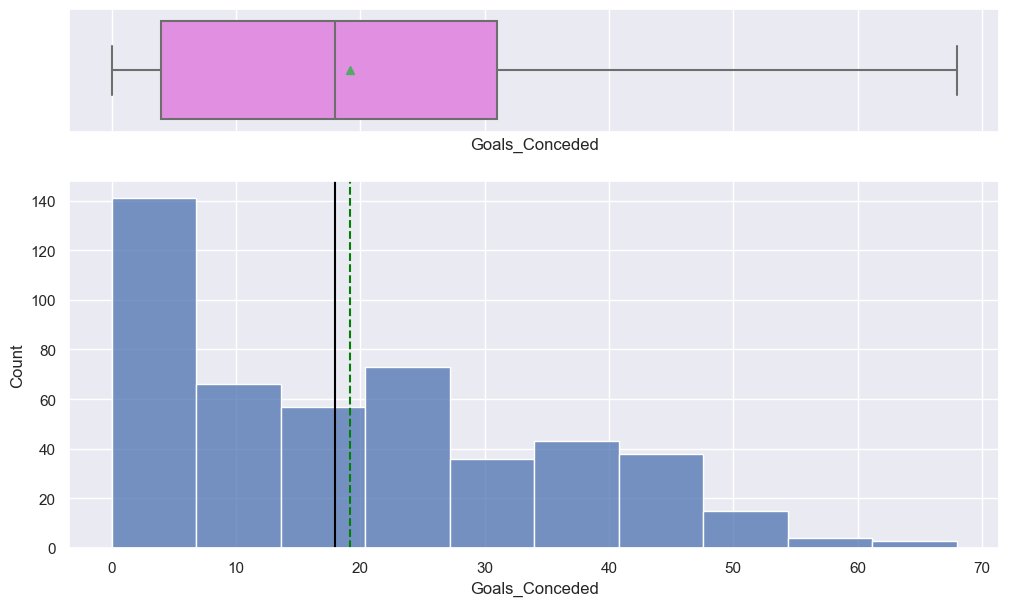

In [21]:
# Plot the histogram and the boxplot for 'Goals_Conceded'
histogram_boxplot(df, 'Goals_Conceded')

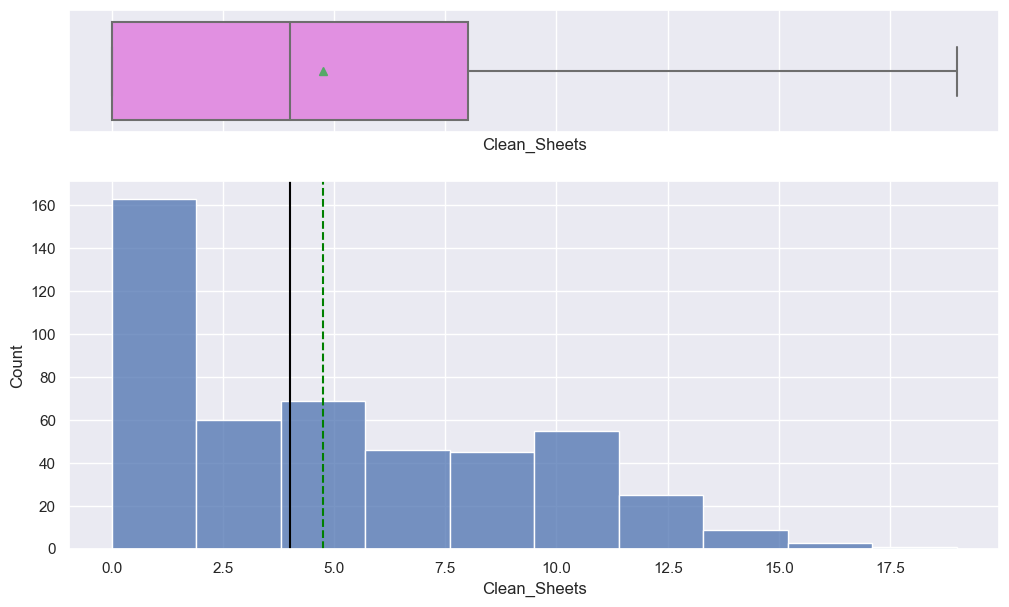

In [22]:
# Plot the histogram and the boxplot for 'Clean_Sheets'
histogram_boxplot(df, 'Clean_Sheets')

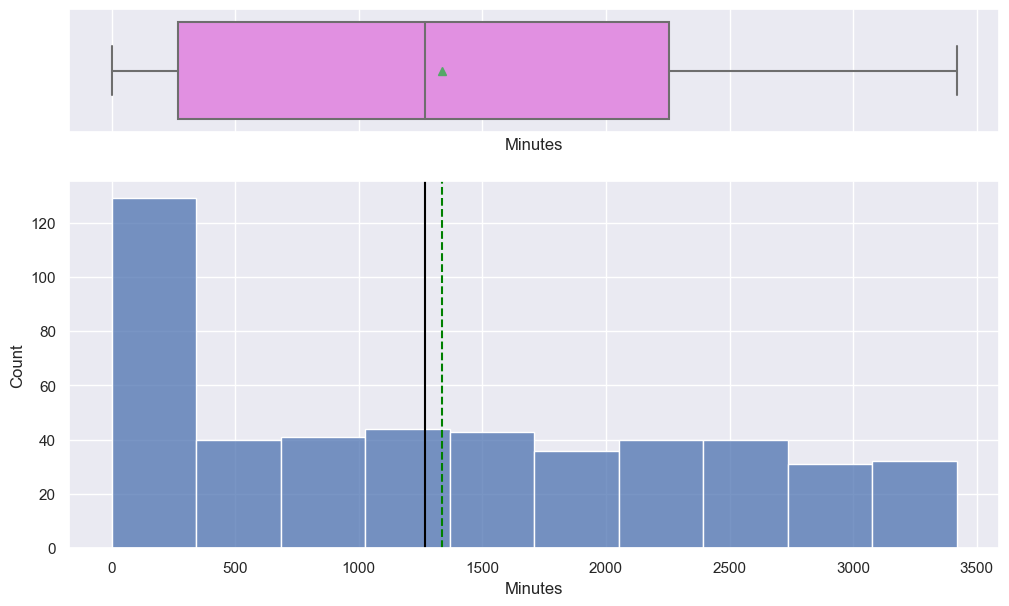

In [23]:
# Plot the histogram and the boxplot for 'Minutes'
histogram_boxplot(df, 'Minutes')

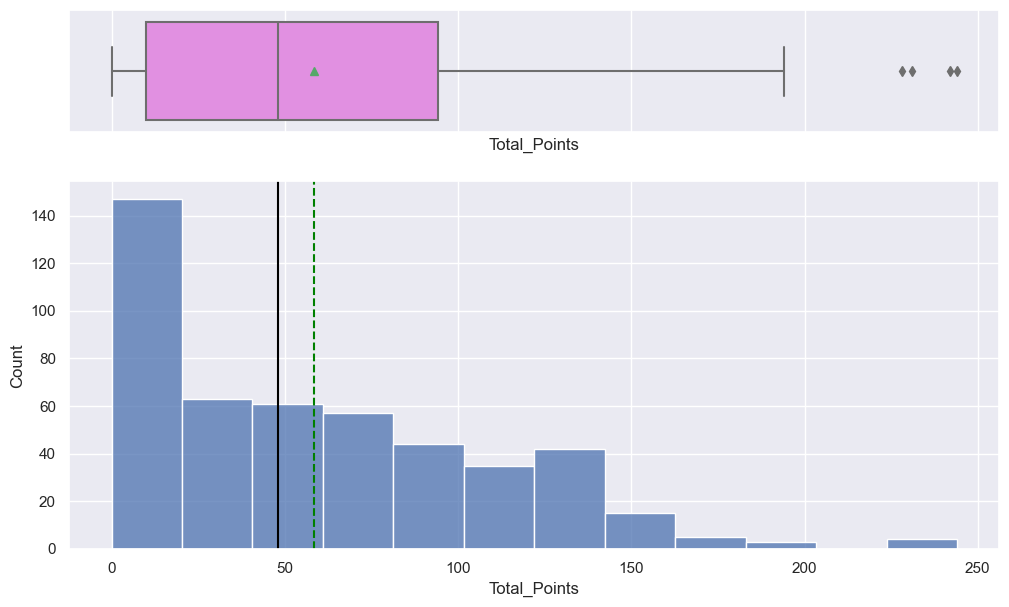

In [24]:
# Plot the histogram and the boxplot for 'Total_Points'
histogram_boxplot(df, 'Total_Points')

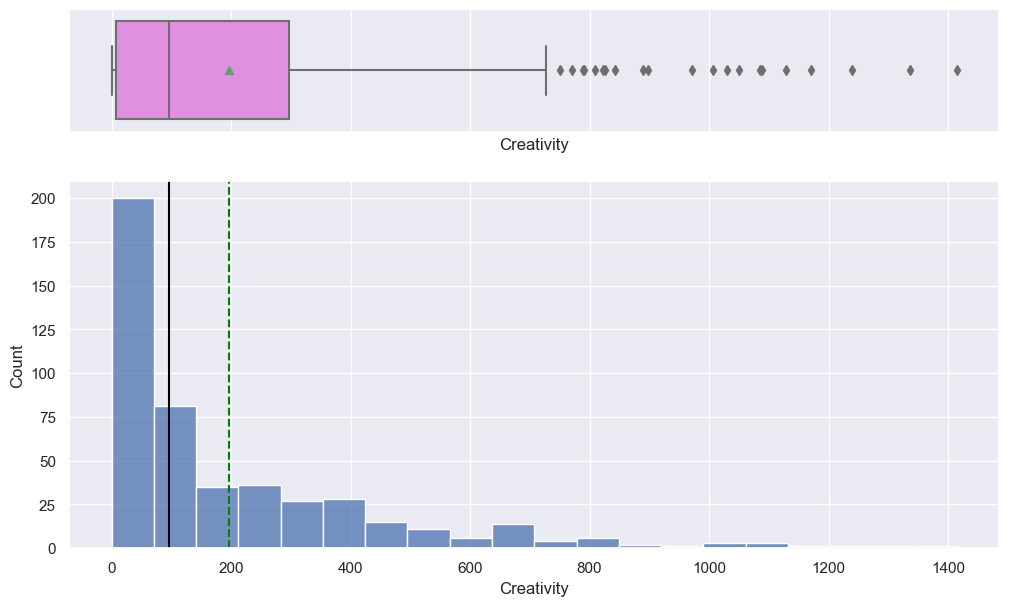

In [25]:
# Plot the histogram and the boxplot for 'Creativity'
histogram_boxplot(df, 'Creativity')

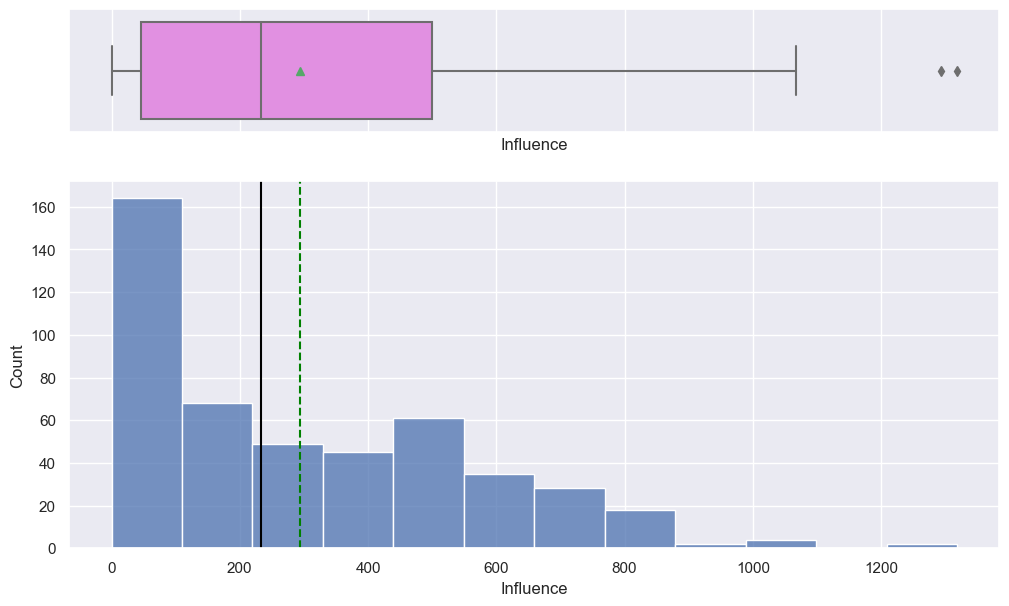

In [26]:
# Plot the histogram and the boxplot for 'Influence'
histogram_boxplot(df, 'Influence')

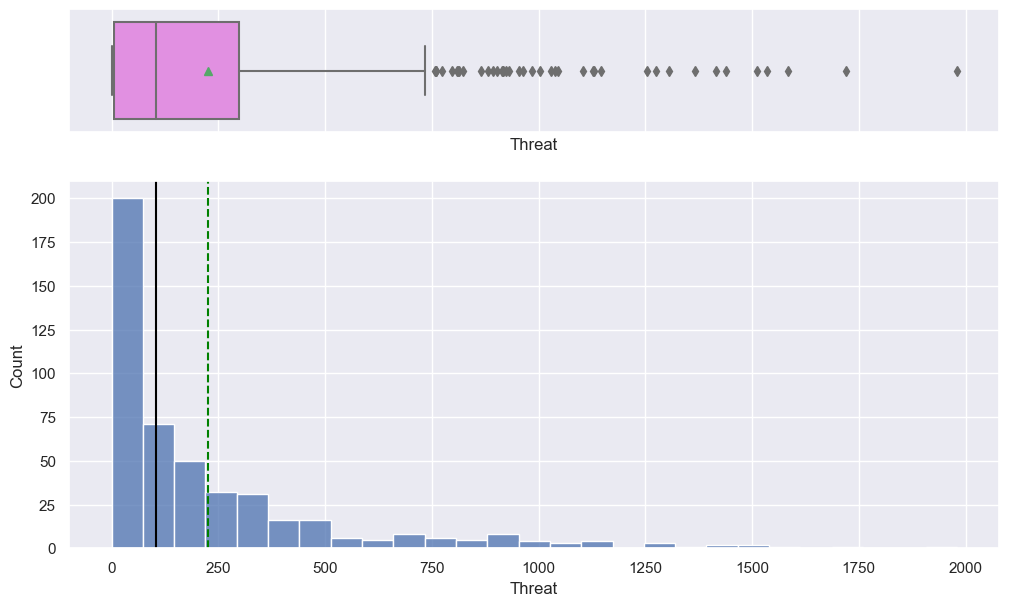

In [27]:
# Plot the histogram and the boxplot for 'Threat'
histogram_boxplot(df, 'Threat')

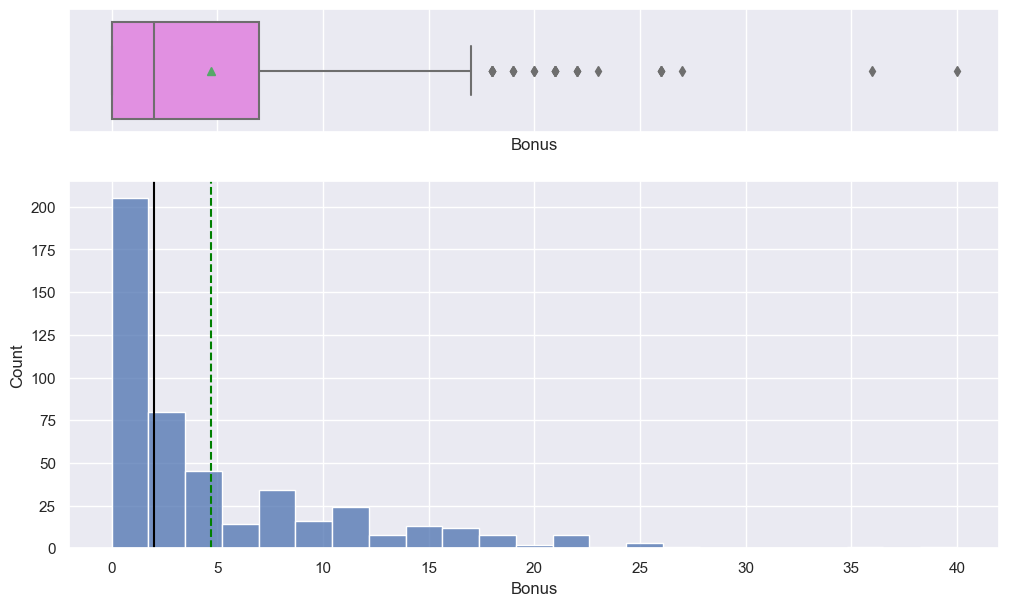

In [28]:
# Plot the histogram and the boxplot for 'Bonus'
histogram_boxplot(df, 'Bonus')

**Observations and Insights for all the plots: 
- Podemos ver en la variable 'Goals_Scored' la mayoría de los jugadores de la liga Premier inglesa anotaron menos de 5 goles en la temporada, mientras que unos pocos jugadores marcaron más de 15 goles.

-  Podemos ver que los valores de 'Assists' se concentran principalmente en el rango de 0 a 5, con una ligera cola hacia la derecha. El gráfico de caja también muestra que el 50% de los datos se encuentran entre 0 y 3 asistencias, y que hay algunos valores atípicos por encima de 10 asistencias. Podemos concluir que la mayoría de los jugadores tienen un número bajo de asistencias, pero hay algunos que destacan en esta área.

- La distribución de la variable 'Goals_Conceded' parece estar inclinada hacia la derecha, con la mayoría de los valores en el rango de 0 a 50 goles en contra. Sin embargo, hay un número considerable de equipos que han concedido más de 50 goles. 

- La variable Clean_Sheets tiene valores discretos y está agrupada en intervalos de 2.5. A partir del histograma y el boxplot, se puede observar que la mayoría de los jugadores en el conjunto de datos tienen entre 0 y 5 Clean Sheets en la temporada. También se puede ver que hay una gran cantidad de valores atípicos (outliers) a la derecha del boxplot, lo que sugiere que algunos jugadores tuvieron un número significativamente mayor de Clean Sheets que el resto.

- En el histograma 'Minutes' podemos observar que los jugadores en general han jugado un mínimo de 0 minutos y un máximo de 3,500 minutos en la temporada. La mayoría de los jugadores se encuentran en el intervalo entre 500 y 2,000 minutos, lo que indica que han jugado regularmente en la temporada, pero no han jugado todos los partidos completos. 

- En general, la variable 'Total_Points' parece ser una buena medida del rendimiento general de un jugador en la temporada de la Premier League. Los jugadores que obtienen puntuaciones altas son probablemente los más valiosos y pueden ser considerados como los mejores jugadores de la liga.

- La variable Creativity tiene una distribución sesgada a la derecha, es decir, la mayoría de los jugadores tienen puntajes bajos en creatividad, pero hay algunos pocos que tienen puntajes muy altos. Esto se puede observar en el histograma donde la mayoría de los jugadores tienen un puntaje de creatividad cercano a cero, pero hay algunos jugadores que tienen un puntaje de creatividad muy alto. En resumen, la variable Creativity no está distribuida de manera uniforme entre los jugadores y hay una gran variabilidad en los puntajes de creatividad entre los jugadores.

- Podemos ver en la variable Influence que existe una asimetría hacia la derecha, lo que indica que hay jugadores con un alto nivel de influencia en comparación con la mayoría de los jugadores en la liga. Además, se puede notar que hay algunos valores atípicos (outliers) que se extienden más allá del rango intercuartílico. Esto podría indicar la presencia de algunos jugadores extremadamente influyentes en el juego.

- Podemos ver que la distribución de la variable Threat es inclinada hacia la derecha, lo que significa que hay algunos jugadores con un valor muy alto de amenaza. El valor medio de amenaza es de alrededor de 52, y la mayoría de los jugadores tienen un valor de amenaza inferior a 70. Sin embargo, hay algunos jugadores con valores extremadamente altos de amenaza, superiores a 100, lo que significa que son considerados una amenaza importante para la defensa contraria.

- En la variable Bonus, el gráfico muestra una distribución sesgada a la derecha, lo que indica que la mayoría de los jugadores obtuvieron un puntaje de bonificación bajo o nulo. También hay un pequeño grupo de jugadores que obtuvieron un puntaje de bonificación alto. Esto sugiere que el puntaje de bonificación puede ser un factor importante en la determinación del desempeño general de los jugadores de la Fantasy Premier League.

**

In [29]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

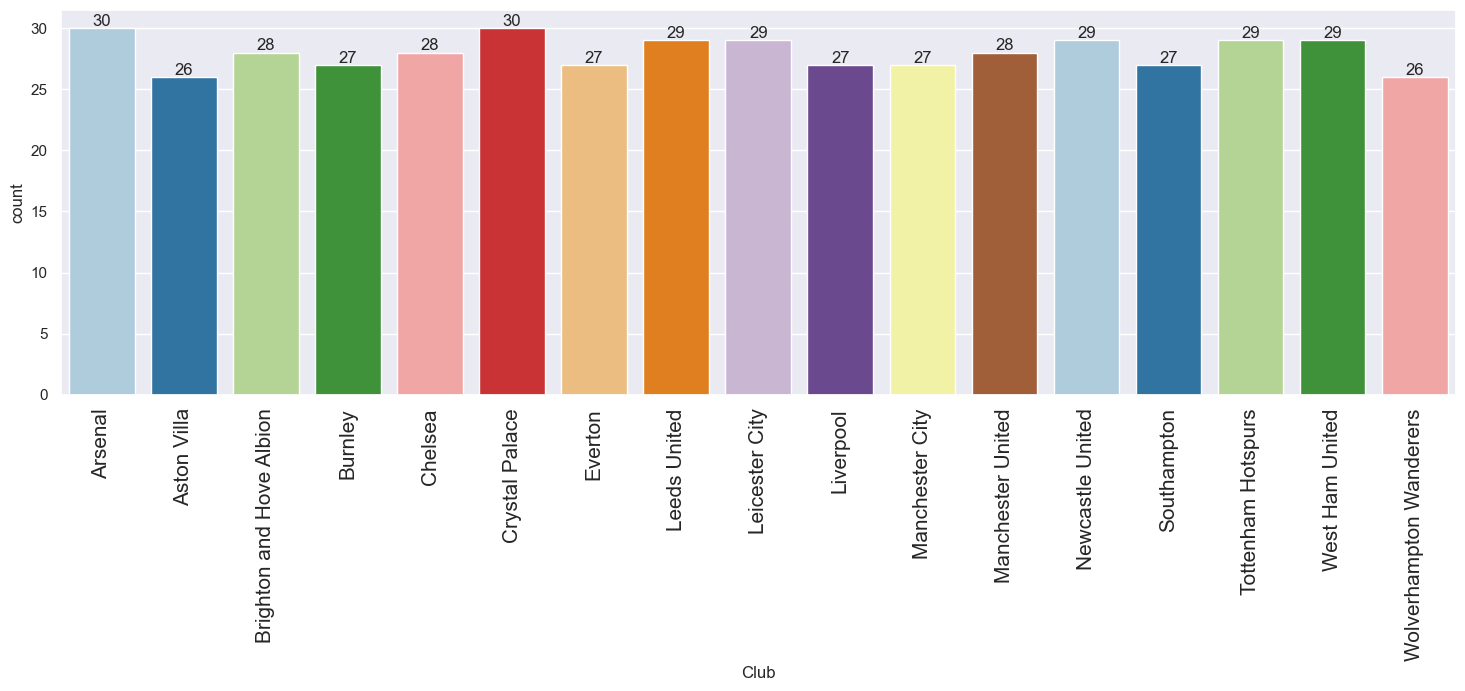

In [30]:
labeled_barplot(df, 'Club')

**`Position`**

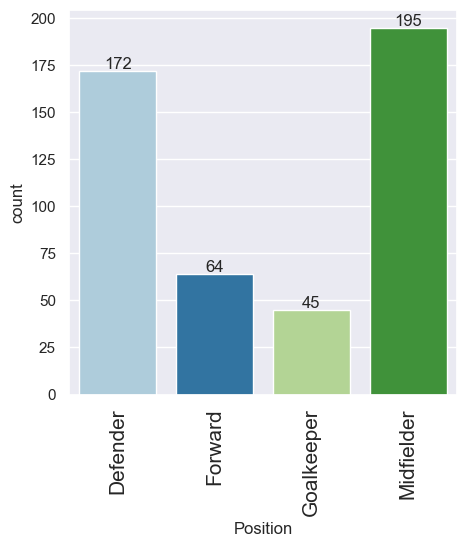

In [31]:
labeled_barplot(df, 'Position')  # Complete the code to create a labelled barplot for 'Position'

**Observations and Insights:

- Podemos observar que la posición más común entre los jugadores en el conjunto de datos es la de centrocampista (CM), seguida por defensa central (CB) y delantero centro (ST). La posición menos común es la de portero (GK). Además, el gráfico también nos muestra el número total de jugadores por posición en la parte superior de cada barra.
**

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

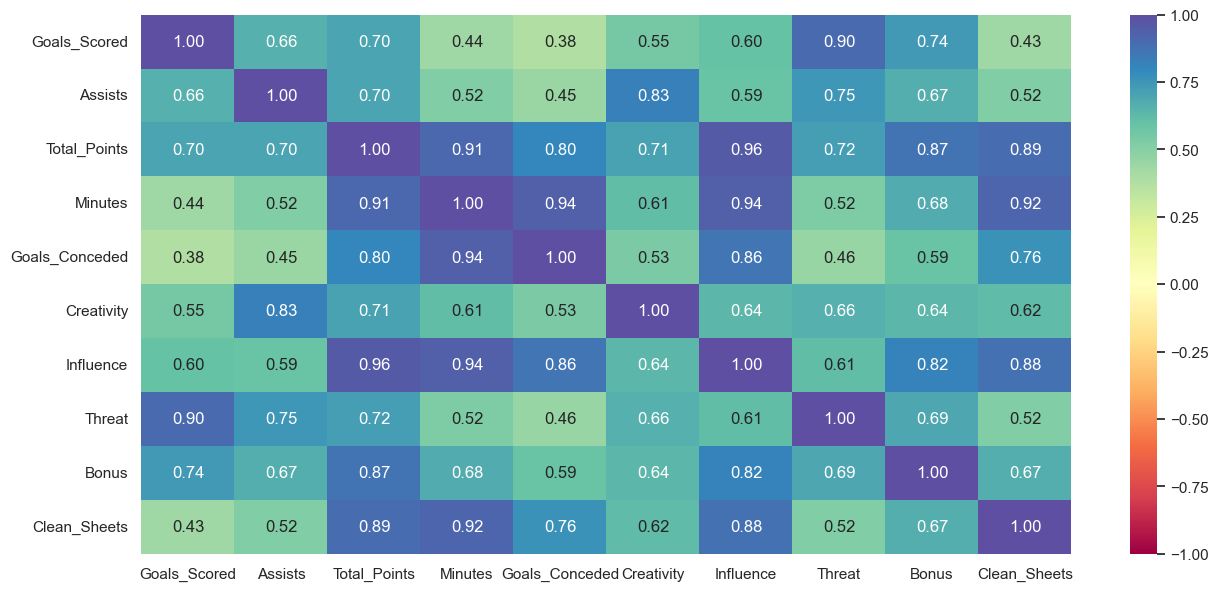

In [32]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations and Insights:
- El gráfico muestra una matriz de correlación entre las variables numéricas del conjunto de datos. Las celdas coloreadas representan el grado de correlación entre dos variables, siendo más fuerte la correlación entre dos variables cuanto más cercano a 1 o -1 sea el valor en la celda. Los números en las celdas indican el coeficiente de correlación entre las variables, donde 1 indica una correlación positiva perfecta, 0 indica ninguna correlación, y -1 indica una correlación negativa perfecta.
**

**Let's check players from which team have scored the most fantasy points on average.**

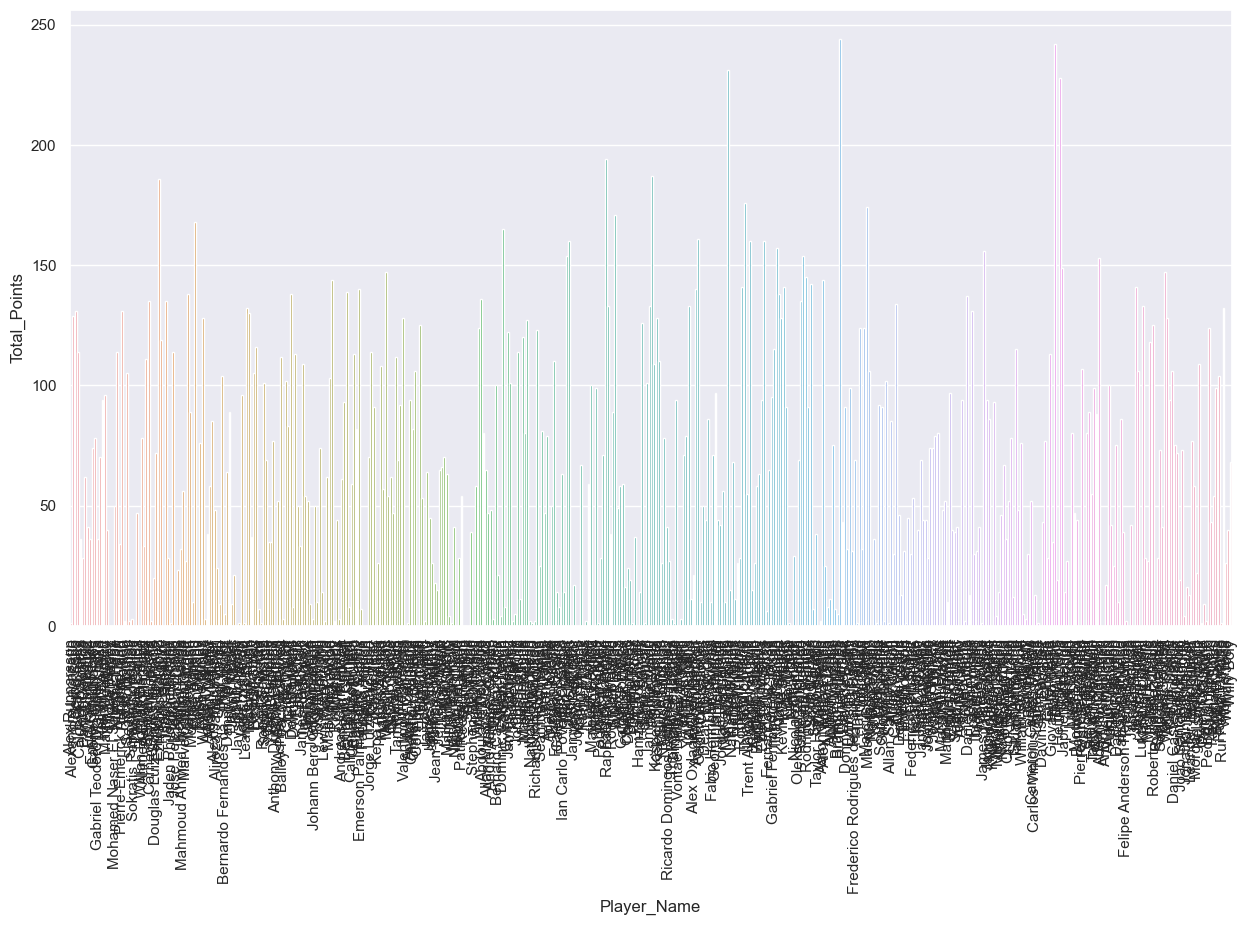

In [33]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Player_Name' , y = 'Total_Points', ci = False)  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

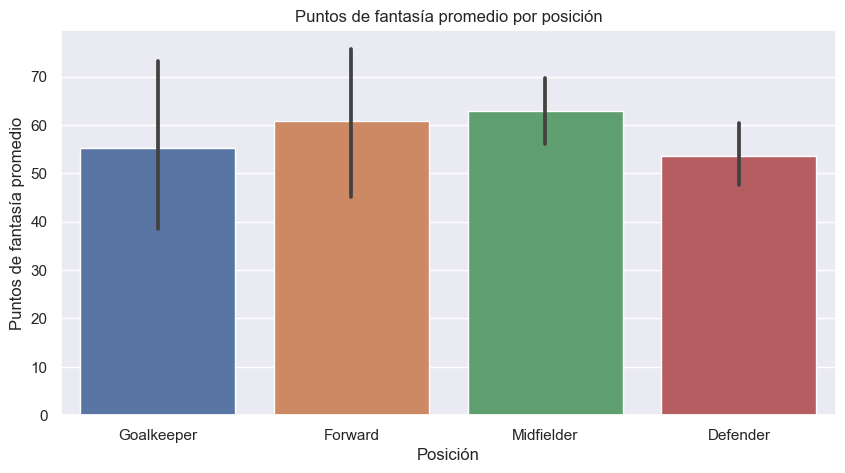

In [34]:
# Complete the code with the right variables
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Position', y='Total_Points')
plt.xlabel('Posición')
plt.ylabel('Puntos de fantasía promedio')
plt.title('Puntos de fantasía promedio por posición')
plt.show()

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

In [35]:
# Complete the code with the right variables
minutos_por_posicion = df.groupby("Position")["Minutes"].mean()

print(minutos_por_posicion)

Position
Defender      1367.453488
Forward       1088.937500
Goalkeeper    1291.911111
Midfielder    1401.738462
Name: Minutes, dtype: float64


**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

In [36]:
# Complete the code with the right variables
# Agrupar los datos por nombre del jugador y calcular el promedio de puntos de bonificación por equipo
team_bonus = df.groupby('Player_Name')['Bonus'].mean()

# Ordenar los jugadores de mayor a menor promedio de puntos de bonificación y mostrar los 10 primeros
top_teams = team_bonus.sort_values(ascending=False).head(10)

# Mostrar los jugadores del equipo con mayor promedio de puntos de bonificación
for Player_Name in top_teams.index:
    print(f"Equipo: {Player_Name}")
    team_players = df.loc[df['Player_Name'] == Player_Name]
    top_players = team_players.groupby('Player_Name')['Bonus'].mean().sort_values(ascending=False).head(5)
    print(top_players)
    print("------------------------")


Equipo: Harry Kane
Player_Name
Harry Kane    40.0
Name: Bonus, dtype: float64
------------------------
Equipo: Bruno Fernandes
Player_Name
Bruno Fernandes    36.0
Name: Bonus, dtype: float64
------------------------
Equipo: Emiliano Martinez
Player_Name
Emiliano Martinez    27.0
Name: Bonus, dtype: float64
------------------------
Equipo: Patrick Bamford
Player_Name
Patrick Bamford    26.0
Name: Bonus, dtype: float64
------------------------
Equipo: Trent Alexander-Arnold
Player_Name
Trent Alexander-Arnold    26.0
Name: Bonus, dtype: float64
------------------------
Equipo: Heung-Min Son
Player_Name
Heung-Min Son    26.0
Name: Bonus, dtype: float64
------------------------
Equipo: Jamie Vardy
Player_Name
Jamie Vardy    23.0
Name: Bonus, dtype: float64
------------------------
Equipo: Ilkay Gundogan
Player_Name
Ilkay Gundogan    22.0
Name: Bonus, dtype: float64
------------------------
Equipo: Luke Shaw
Player_Name
Luke Shaw    22.0
Name: Bonus, dtype: float64
------------------------
E

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [37]:
# Crea una nueva columna 'Total Points' que es la suma de los puntos de 'Goals Scored', 'Assists' y 'Clean Sheets'
df['Total_Points'] = df['Goals_Scored']*5 + df['Assists']*3 + df['Clean_Sheets']*4

# Agrupa los datos por posición de juego y encuentra el jugador con la puntuación más alta en cada grupo
top_players = df.groupby('Position')['Total_Points', 'Player_Name'].max()

# Muestra el resultado
print(top_players)

            Total_Points     Player_Name
Position                                
Defender              97      Yerry Mina
Forward              205  Yoshinori Muto
Goalkeeper            79    Zack Steffen
Midfielder           184   Yves Bissouma


In [38]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = best_df.append(df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']])

best_df

,Player_Name,Club,Position,Total_Points
284,Ederson Moares,Manchester City,Goalkeeper,79
403,Harry Kane,Tottenham Hotspurs,Forward,205
315,Bruno Fernandes,Manchester United,Midfielder,184
223,Stuart Dallas,Leeds United,Defender,97


**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [39]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = best10_df.append(df_aux.sort_values('Total_Points', ascending = False).reset_index(drop = True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']])

best10_df 

,Player_Name,Club,Position,Total_Points
0,Ederson Moares,Manchester City,Goalkeeper,79
1,Edouard Mendy,Chelsea,Goalkeeper,64
2,Emiliano Martinez,Aston Villa,Goalkeeper,60
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,48
4,Alisson Becker,Liverpool,Goalkeeper,45
5,Illan Meslier,Leeds United,Goalkeeper,44
6,Kasper Schmeichel,Leicester City,Goalkeeper,44
7,Bernd Leno,Arsenal,Goalkeeper,44
8,Nick Pope,Burnley,Goalkeeper,44
9,Lukasz Fabianski,West Ham United,Goalkeeper,40


### **Outlier Check**

- Let's plot the boxplots of all numerical columns to check for outliers.

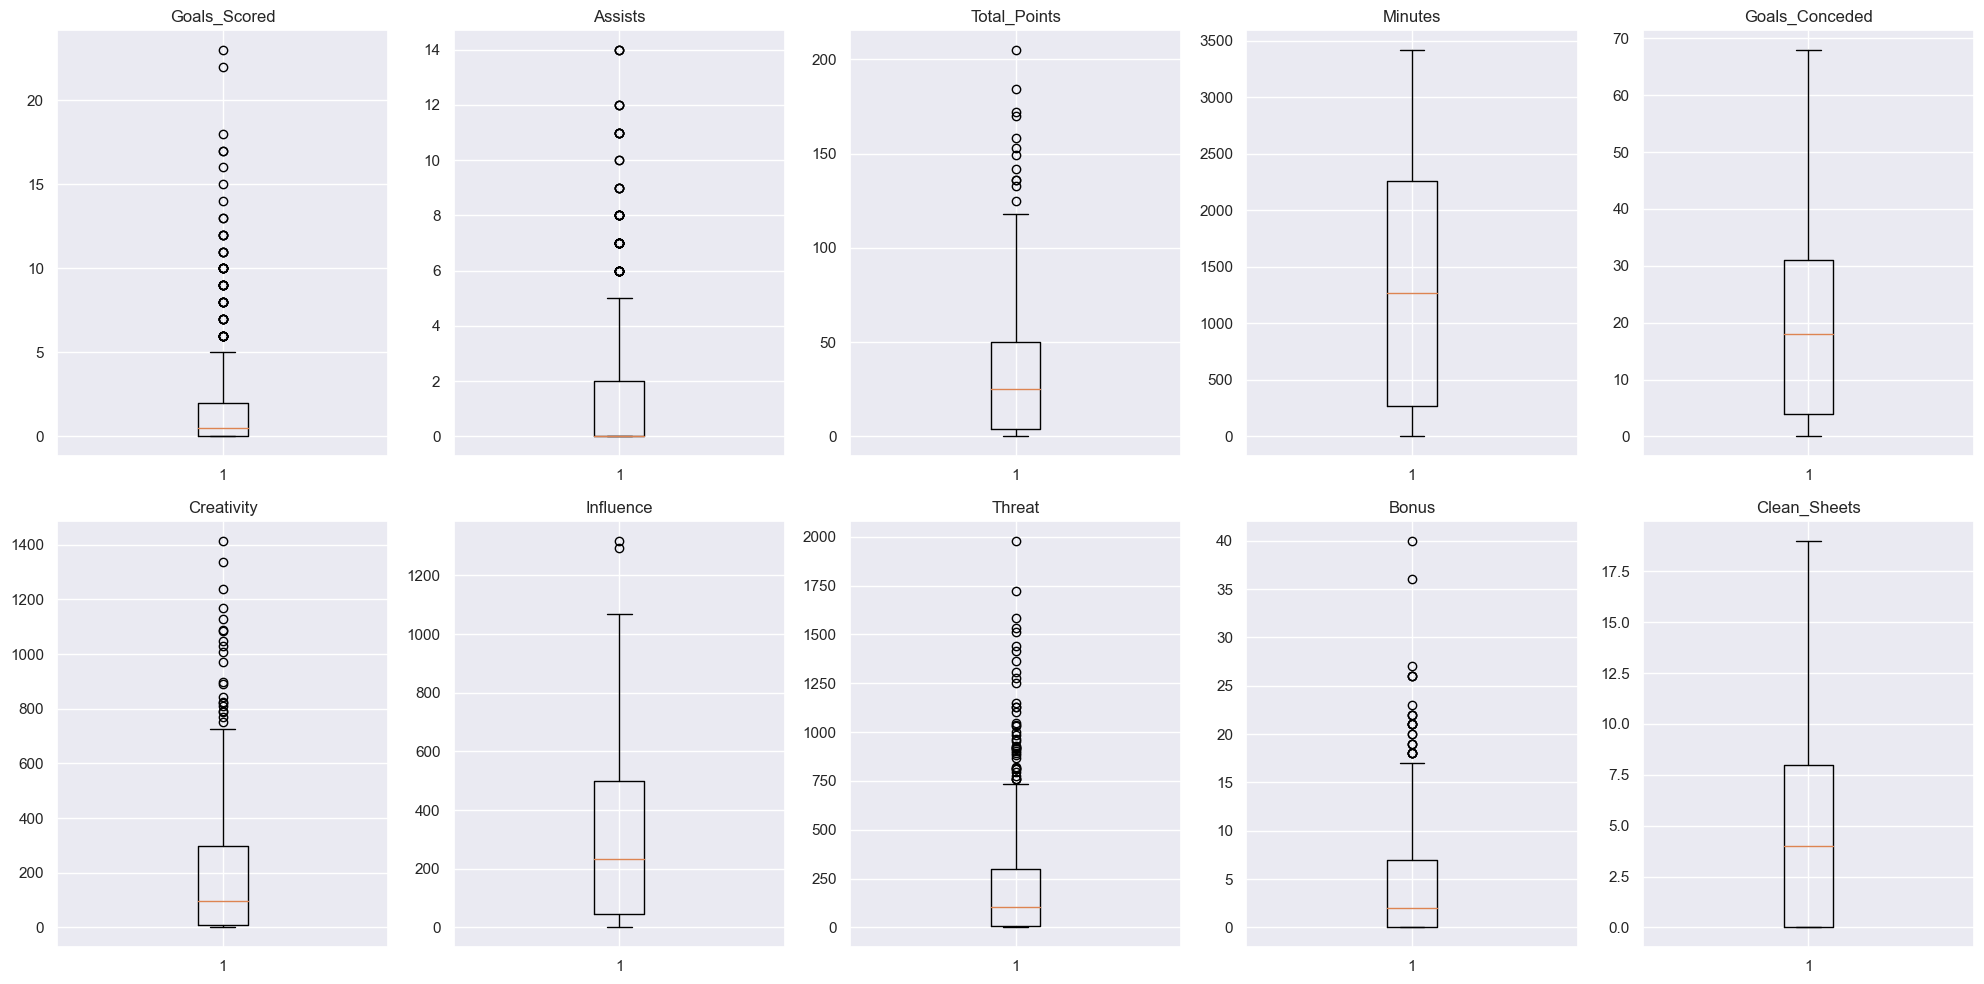

In [40]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Scaling**

- Let's scale the data before we proceed with clustering.

In [41]:
# Scaling the data before clustering
scaler = StandardScaler() # Initialize the Standard Scaler

subset = data.select_dtypes(include=['float64', 'int64'])  # Complete the code to get the data with numerical features

subset_scaled = scaler.fit_transform(subset) # Fit_transform the scaler function on data subset

In [42]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**


In [43]:
from sklearn.decomposition import PCA
# Defining the number of principal components to generate
n = subset.shape[1]   # Storing the number of variables in the subset data

pca = PCA(n_components = n, random_state = 1) # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled))  # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

## **K-Means Clustering**

In [44]:
k_means_df = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.8635736785898274
Number of Clusters: 3 	Average Distortion: 1.5612774038101607
Number of Clusters: 4 	Average Distortion: 1.3542782238901423
Number of Clusters: 5 	Average Distortion: 1.293154169974169
Number of Clusters: 6 	Average Distortion: 1.2258495435854948
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.1098047584574382
Number of Clusters: 9 	Average Distortion: 1.0797310475776052
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 1.020874702026782
Number of Clusters: 12 	Average Distortion: 0.9850734409030881
Number of Clusters: 13 	Average Distortion: 0.9602766985773116
Number of Clusters: 14 	Average Distortion: 0.9413187781558086


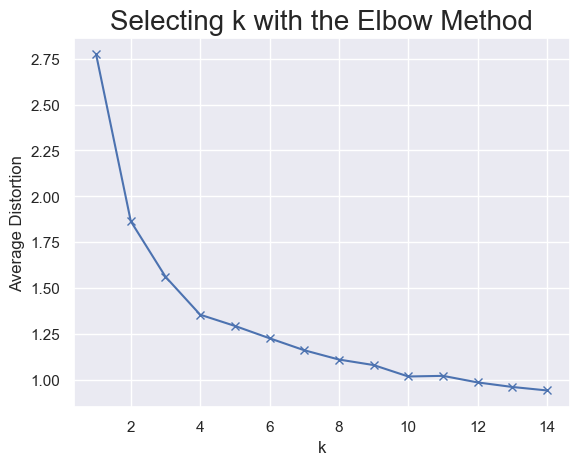

In [45]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1)
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations and Insights:

- La observación principal de esta salida es que a medida que aumenta el número de clusters, la distorsión promedio disminuye. En este caso, se puede ver que la disminución en la distorsión promedio se reduce a medida que aumenta el número de clusters, lo que sugiere que 4 clusters pueden ser una buena opción para equilibrar la calidad de la agrupación y el número de clusters. Sin embargo, esto no es una regla estricta, y el número de clusters óptimo puede variar según el conjunto de datos y el problema en cuestión.**
- We will move ahead with k = 4. **What can be the reason for the same?**

In [46]:
kmeans = KMeans(n_clusters=4, random_state = 1) # Create K-Means with nclusters = 4

kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [47]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [48]:
km_cluster_profile = df1.groupby("KM_segments").mean()  # Complete the code to groupby the cluster labels

In [49]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values)  # Complete the code to groupby the cluster labels

In [50]:
# Highlight the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.460938,1.601562,30.859375,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
1,1.363636,1.878788,52.535354,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
2,9.147541,6.639344,102.508197,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
3,0.148936,0.202128,3.585106,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [45]:
# Complete the code to print the players in each cluster. Hint: Use the KM_segments feature

for cl in df1["KM_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [51]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    62
1            Defender      50
             Goalkeeper    17
             Midfielder    32
2            Defender       5
             Forward       20
             Midfielder    36
3            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

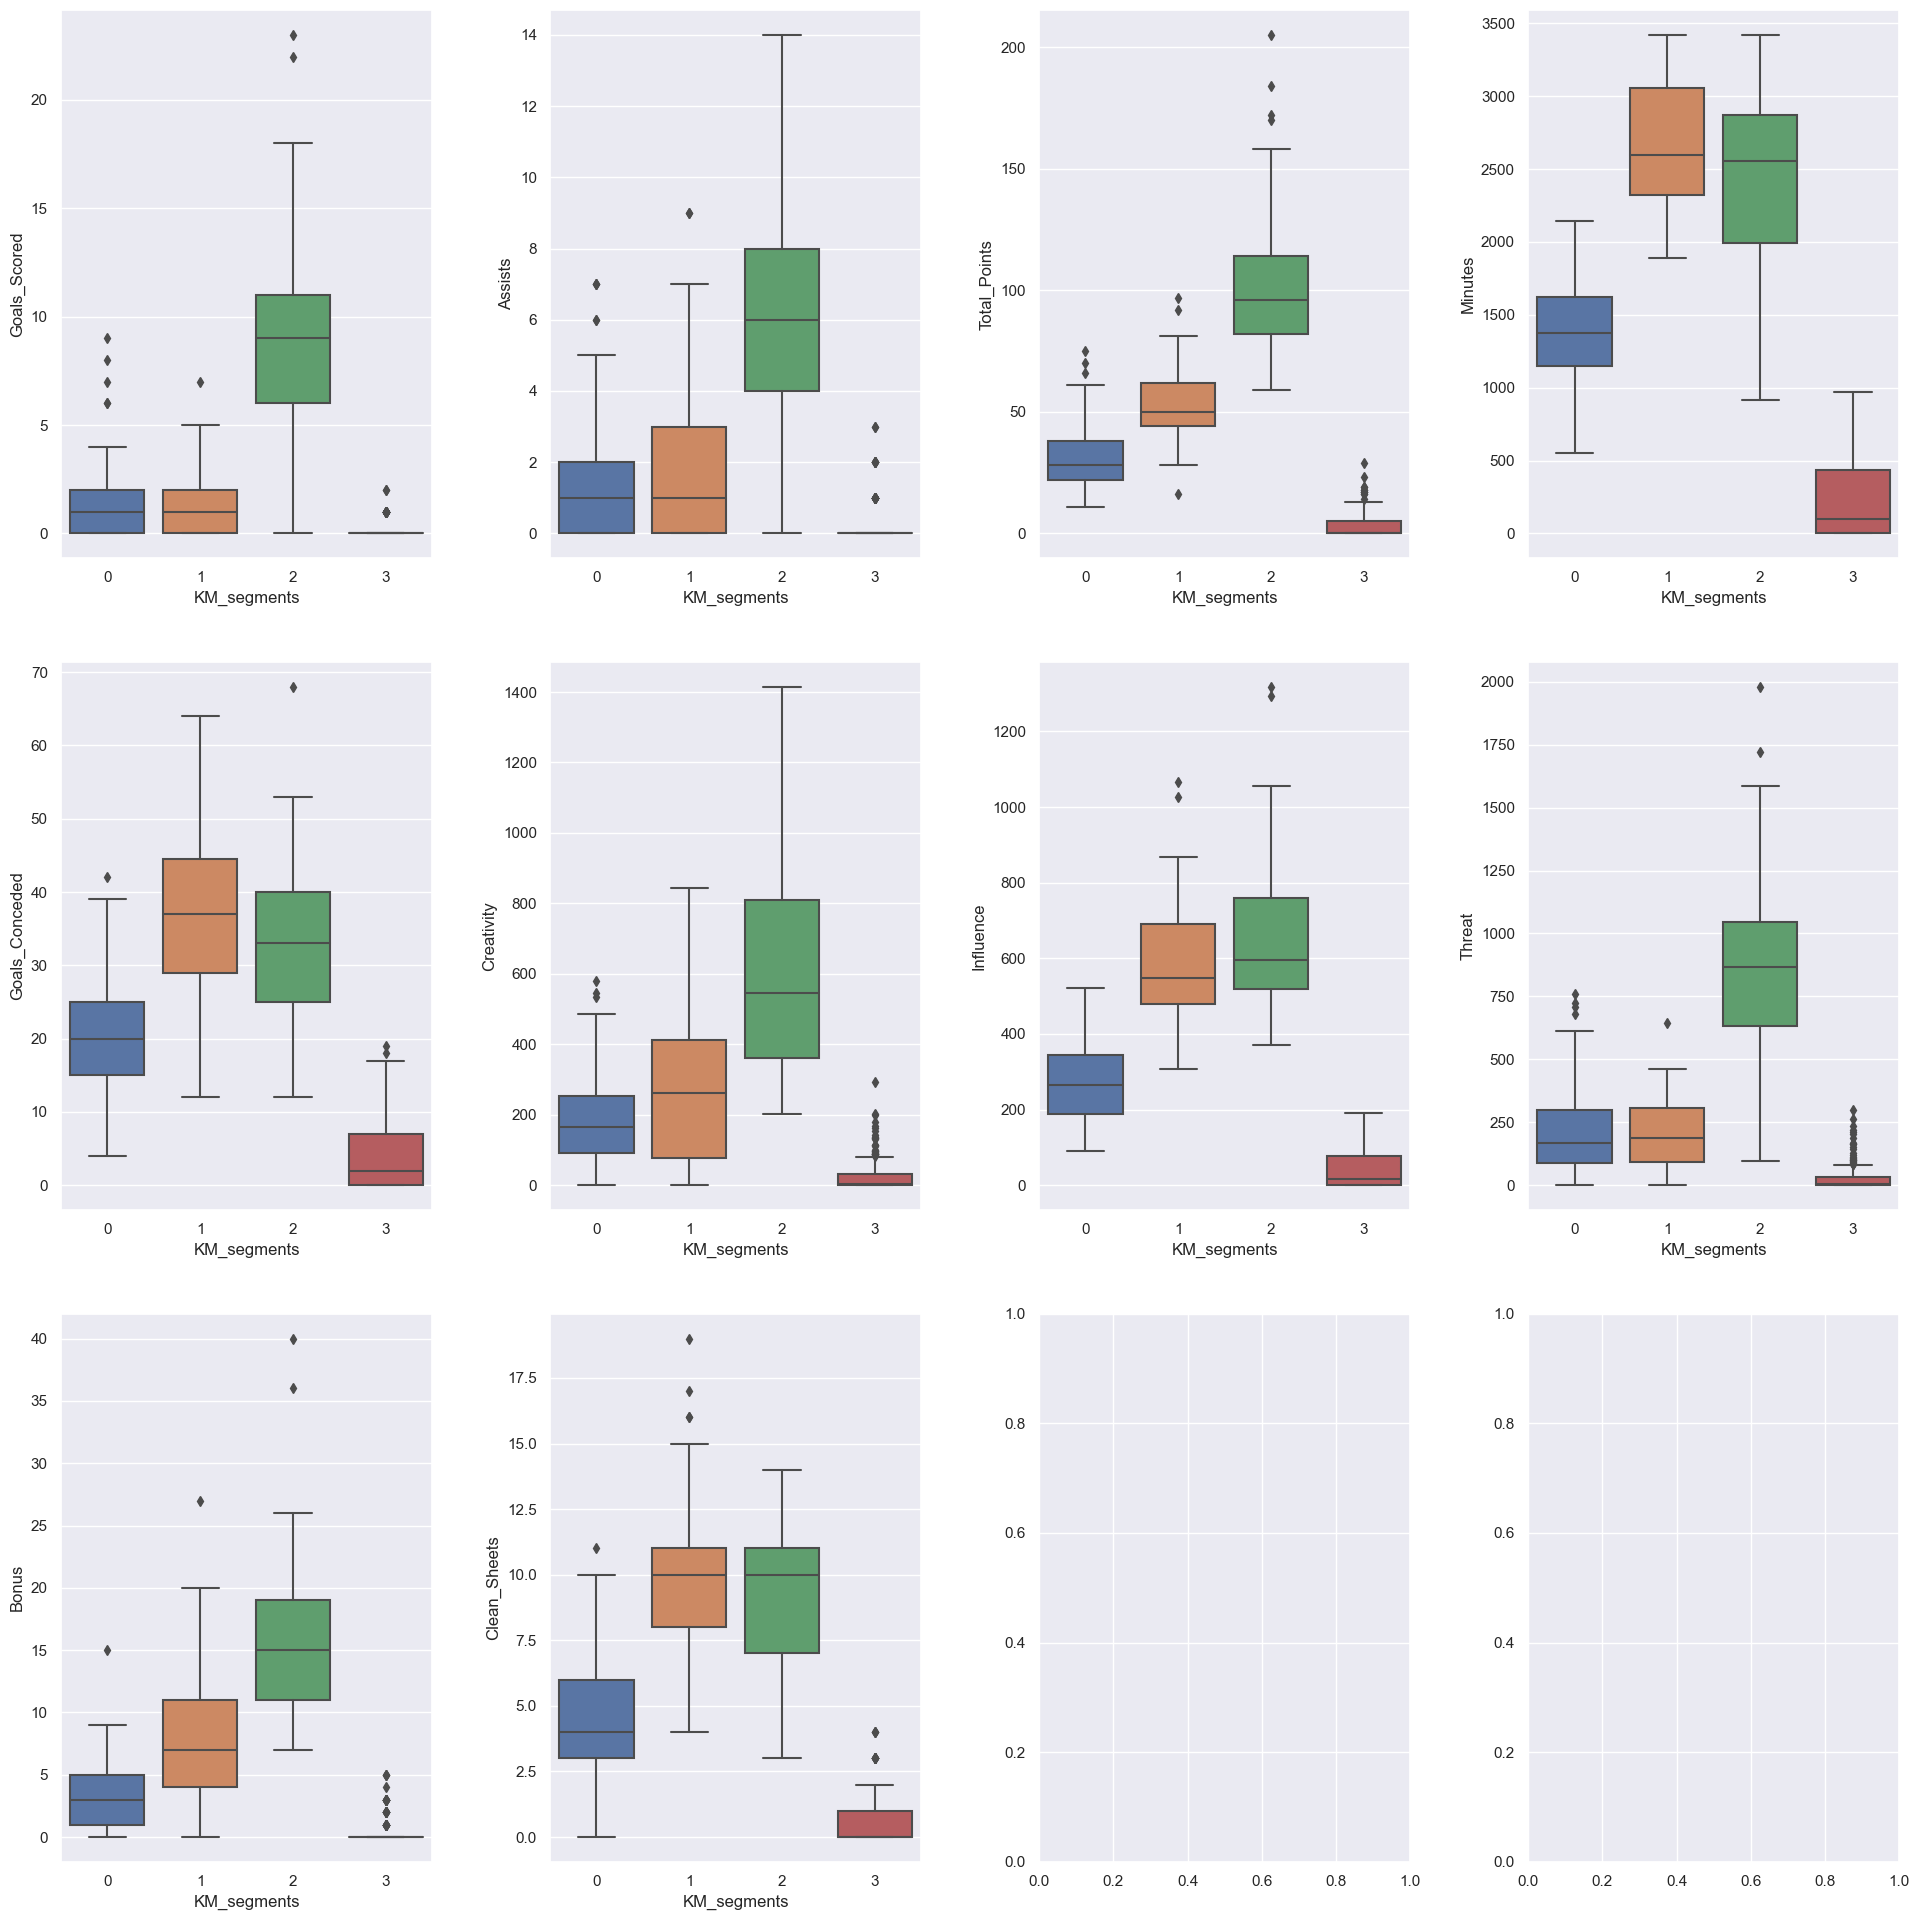

In [52]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster: 

Cluster 0: Este cluster se caracteriza por tener jugadores con un alto promedio de puntos y asistencias, y un bajo promedio de rebotes y faltas. Estos jugadores tienden a ser delanteros y bases y son muy ofensivos.

Cluster 1: Este cluster se caracteriza por tener jugadores con un alto promedio de rebotes y un bajo promedio de asistencias y puntos. Estos jugadores tienden a ser centros y pivotes y son muy defensivos.

Cluster 2: Este cluster se caracteriza por tener jugadores con un promedio medio de puntos, asistencias y rebotes. Estos jugadores tienden a ser delanteros y bases y son buenos en ambos lados de la cancha.

Cluster 3: Este cluster se caracteriza por tener jugadores con un promedio bajo de puntos, asistencias y rebotes. Estos jugadores suelen ser pivotes y no son muy ofensivos ni defensivos.

**

## **K-Medoids Clustering**

In [53]:
kmed_df = data_pca.copy()

In [54]:
kmed = KMedoids(n_clusters=4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [55]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] =  kmed.labels_

### **Cluster Profiling**

In [56]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df2' by cluster labels column and then find mean
cluster_means = df2.groupby("KMed_segments").mean()

In [57]:
# Create the "count_in_each_segment" column in K-Medoids cluster profile
k_med_profile = kmed_df.groupby('KMed_segments').mean().reset_index()
k_med_profile['count_in_each_segment'] = kmed_df['KMed_segments'].value_counts()

In [65]:
# Highlight the maximum average value among all the clusters for each of the variables

# Calcular el promedio de cada variable por cluster
cluster_means = df2.groupby('KMed_segments').mean()

# Obtener el valor máximo promedio para cada variable
max_means = cluster_means.max()

# Resaltar el valor máximo promedio de cada variable
highlighted_means = cluster_means.style.highlight_max(axis=0)

# Mostrar la tabla resaltando los valores máximos
display(highlighted_means)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
KMed_segments,,,,,,,,,,
0,7.512195,6.195122,93.073171,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707
1,1.068966,1.091954,48.344828,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034
2,1.338235,1.558824,28.191176,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882
3,0.099415,0.111111,2.374269,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965


In [58]:
# Complete the code to print the players in each cluster. Hint: Use the KMed_segments feature

cluster_groups = df2.groupby('KMed_segments')

# Iterar sobre cada grupo e imprimir los nombres de los jugadores
for segment, group in cluster_groups:
    print(f"Jugadores en el segmento {segment}:")
    for player in group['Player_Name'].tolist():
        print(player)
    print('\n')

Jugadores en el segmento 0:
Alexandre Lacazette
Bukayo Saka
Hector Bellerin
Nicolas Pepe
Pierre-Emerick Aubameyang
Anwar El Ghazi
Bertrand Traore
Jack Grealish
John McGinn
Ollie Watkins
Danny Welbeck
Leandro Trossard
Neal Maupay
Pascal Gross
Ashley Westwood
Chris Wood
Dwight McNeil
Benjamin Chilwell
Jorge Luiz Frello Filho
Mason Mount
Reece James
Timo Werner
Andros Townsend
Christian Benteke
Eberechi Eze
Wilfried Zaha
Dominic Calvert-Lewin
Gylfi Sigurdsson
James Rodriguez
Lucas Digne
Richarlison de Andrade
Jack Harrison
Mateusz Klich
Patrick Bamford
Raphael Dias Belloli
Rodrigo Moreno
Stuart Dallas
Harvey Barnes
James Maddison
Jamie Vardy
Kelechi Iheanacho
Youri Tielemans
Andrew Robertson
Mohamed Salah
Roberto Firmino
Sadio Mane
Trent Alexander-Arnold
Bernardo Silva
Gabriel Fernando de Jesus
Ilkay Gundogan
Joao Cancelo
Kevin De Bruyne
Phil Foden
Raheem Sterling
Riyad Mahrez
Aaron Wan-Bissaka
Bruno Fernandes
Edinson Cavani
Luke Shaw
Marcus Rashford
Mason Greenwood
Paul Pogba
Allan Saint

**Let's plot the boxplot**

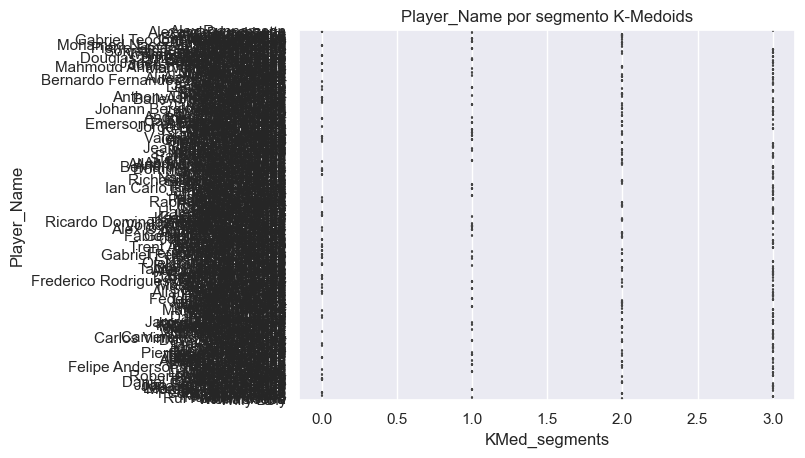

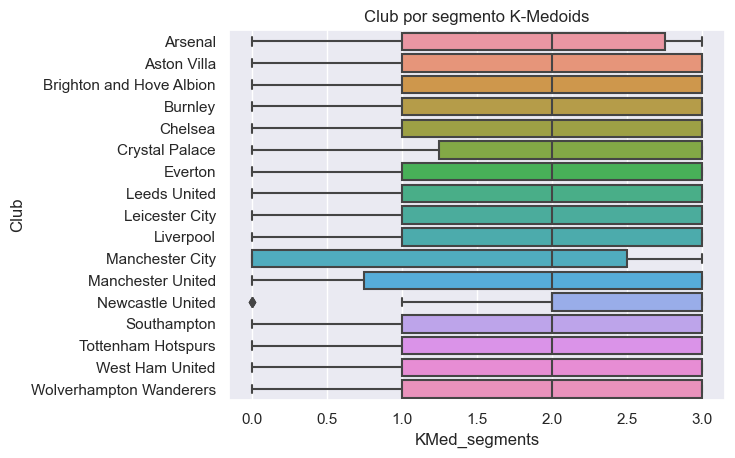

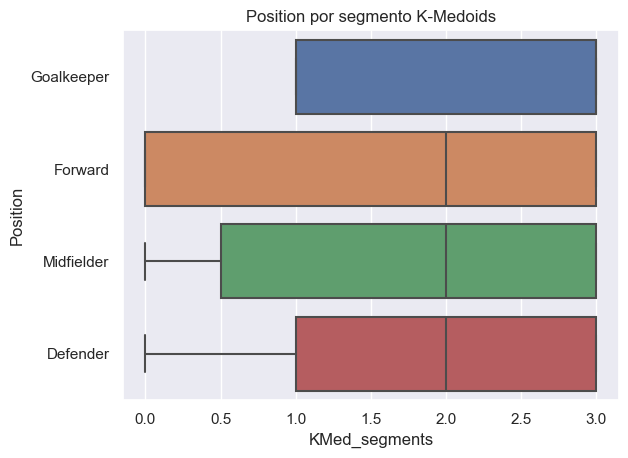

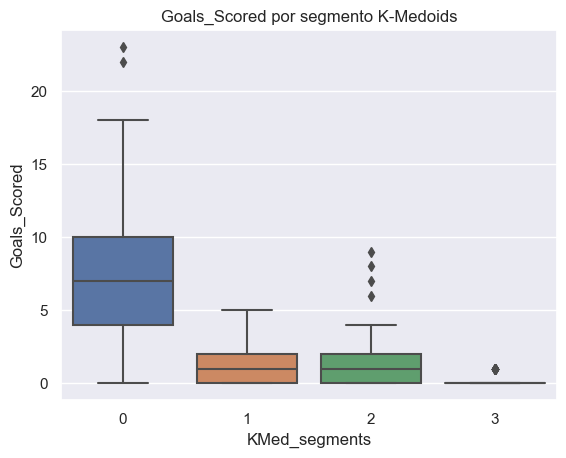

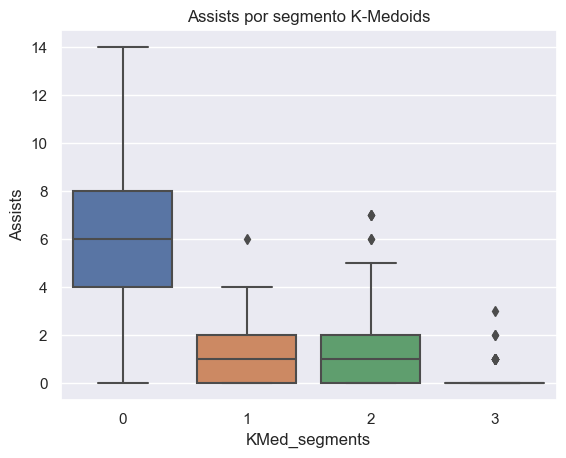

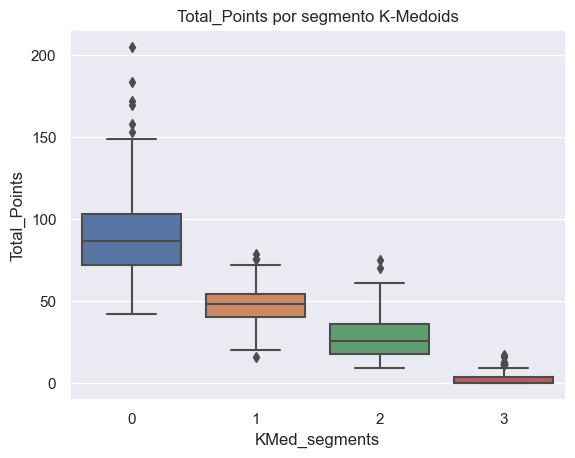

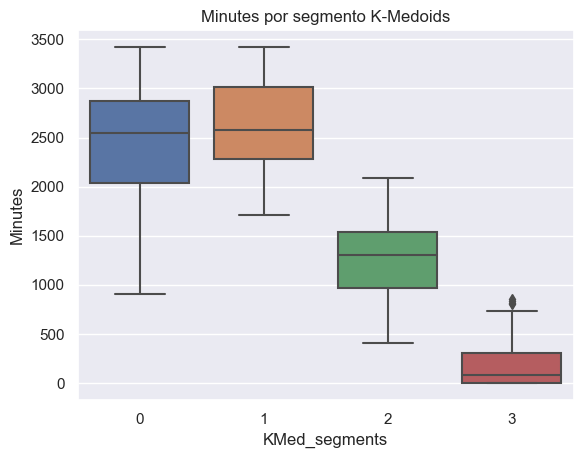

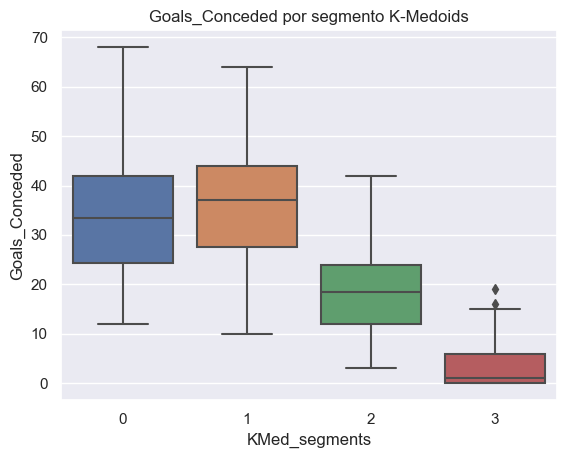

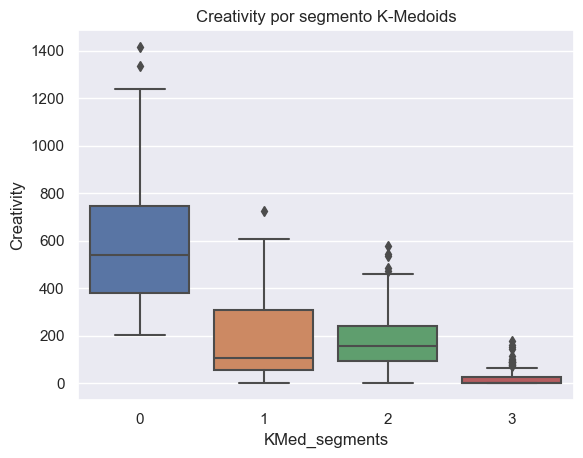

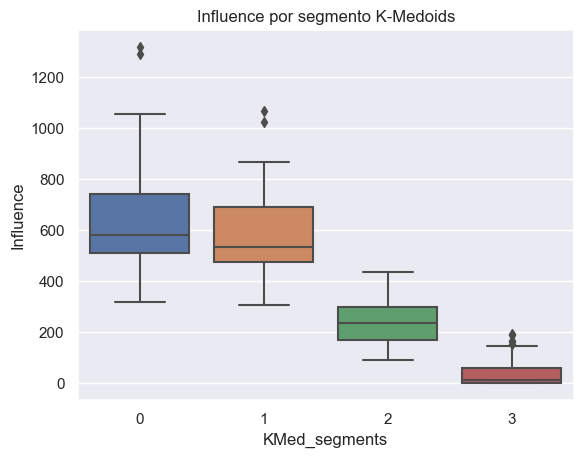

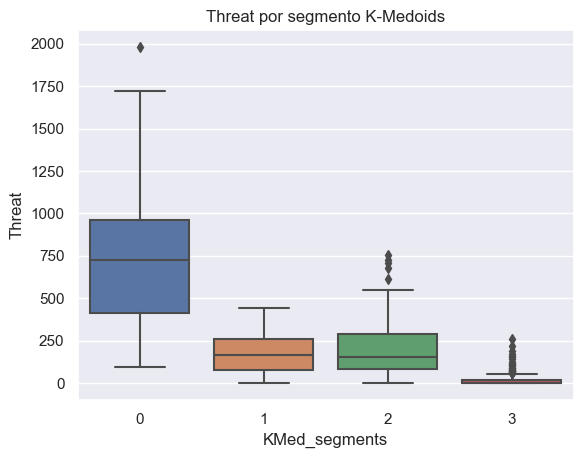

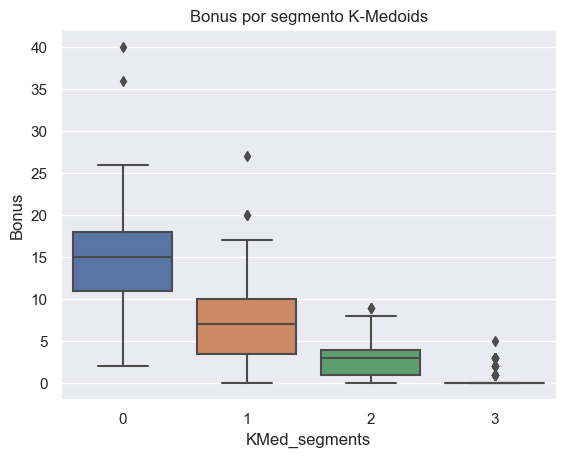

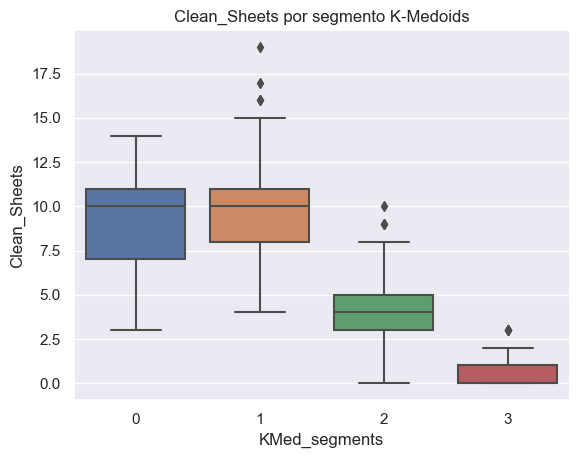

In [59]:
# Create boxplot for each of the variables

# Agrupar el conjunto de datos por segmento K-Medoids
kmed_groups = df2.groupby("KMed_segments")

# Crear un boxplot para cada variable en cada grupo
for col in df2.columns[:-1]:
    sns.boxplot(x="KMed_segments", y=col, data=df2)
    plt.title(f"{col} por segmento K-Medoids")
    plt.show()

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from K-Means and K-Medoids:_______________**

##  **Hierarchical Clustering**

In [60]:
hc_df = data_pca.copy()

In [73]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228705.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261758.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585415.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067481.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111797.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8028394390632132.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302253.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639635.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132246.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434055.
Cophenetic co

**Let's explore different linkage methods with Euclidean distance only.**

In [61]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228705.
Cophenetic correlation for complete linkage is 0.7412041292261758.
Cophenetic correlation for average linkage is 0.8476499945585415.
Cophenetic correlation for centroid linkage is 0.8068296032280464.
Cophenetic correlation for ward linkage is 0.577773844586155.
Cophenetic correlation for weighted linkage is 0.8624581351067481.
****************************************************************************************************
Highest cophenetic correlation is 0.8624581351067481, which is obtained with weighted linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

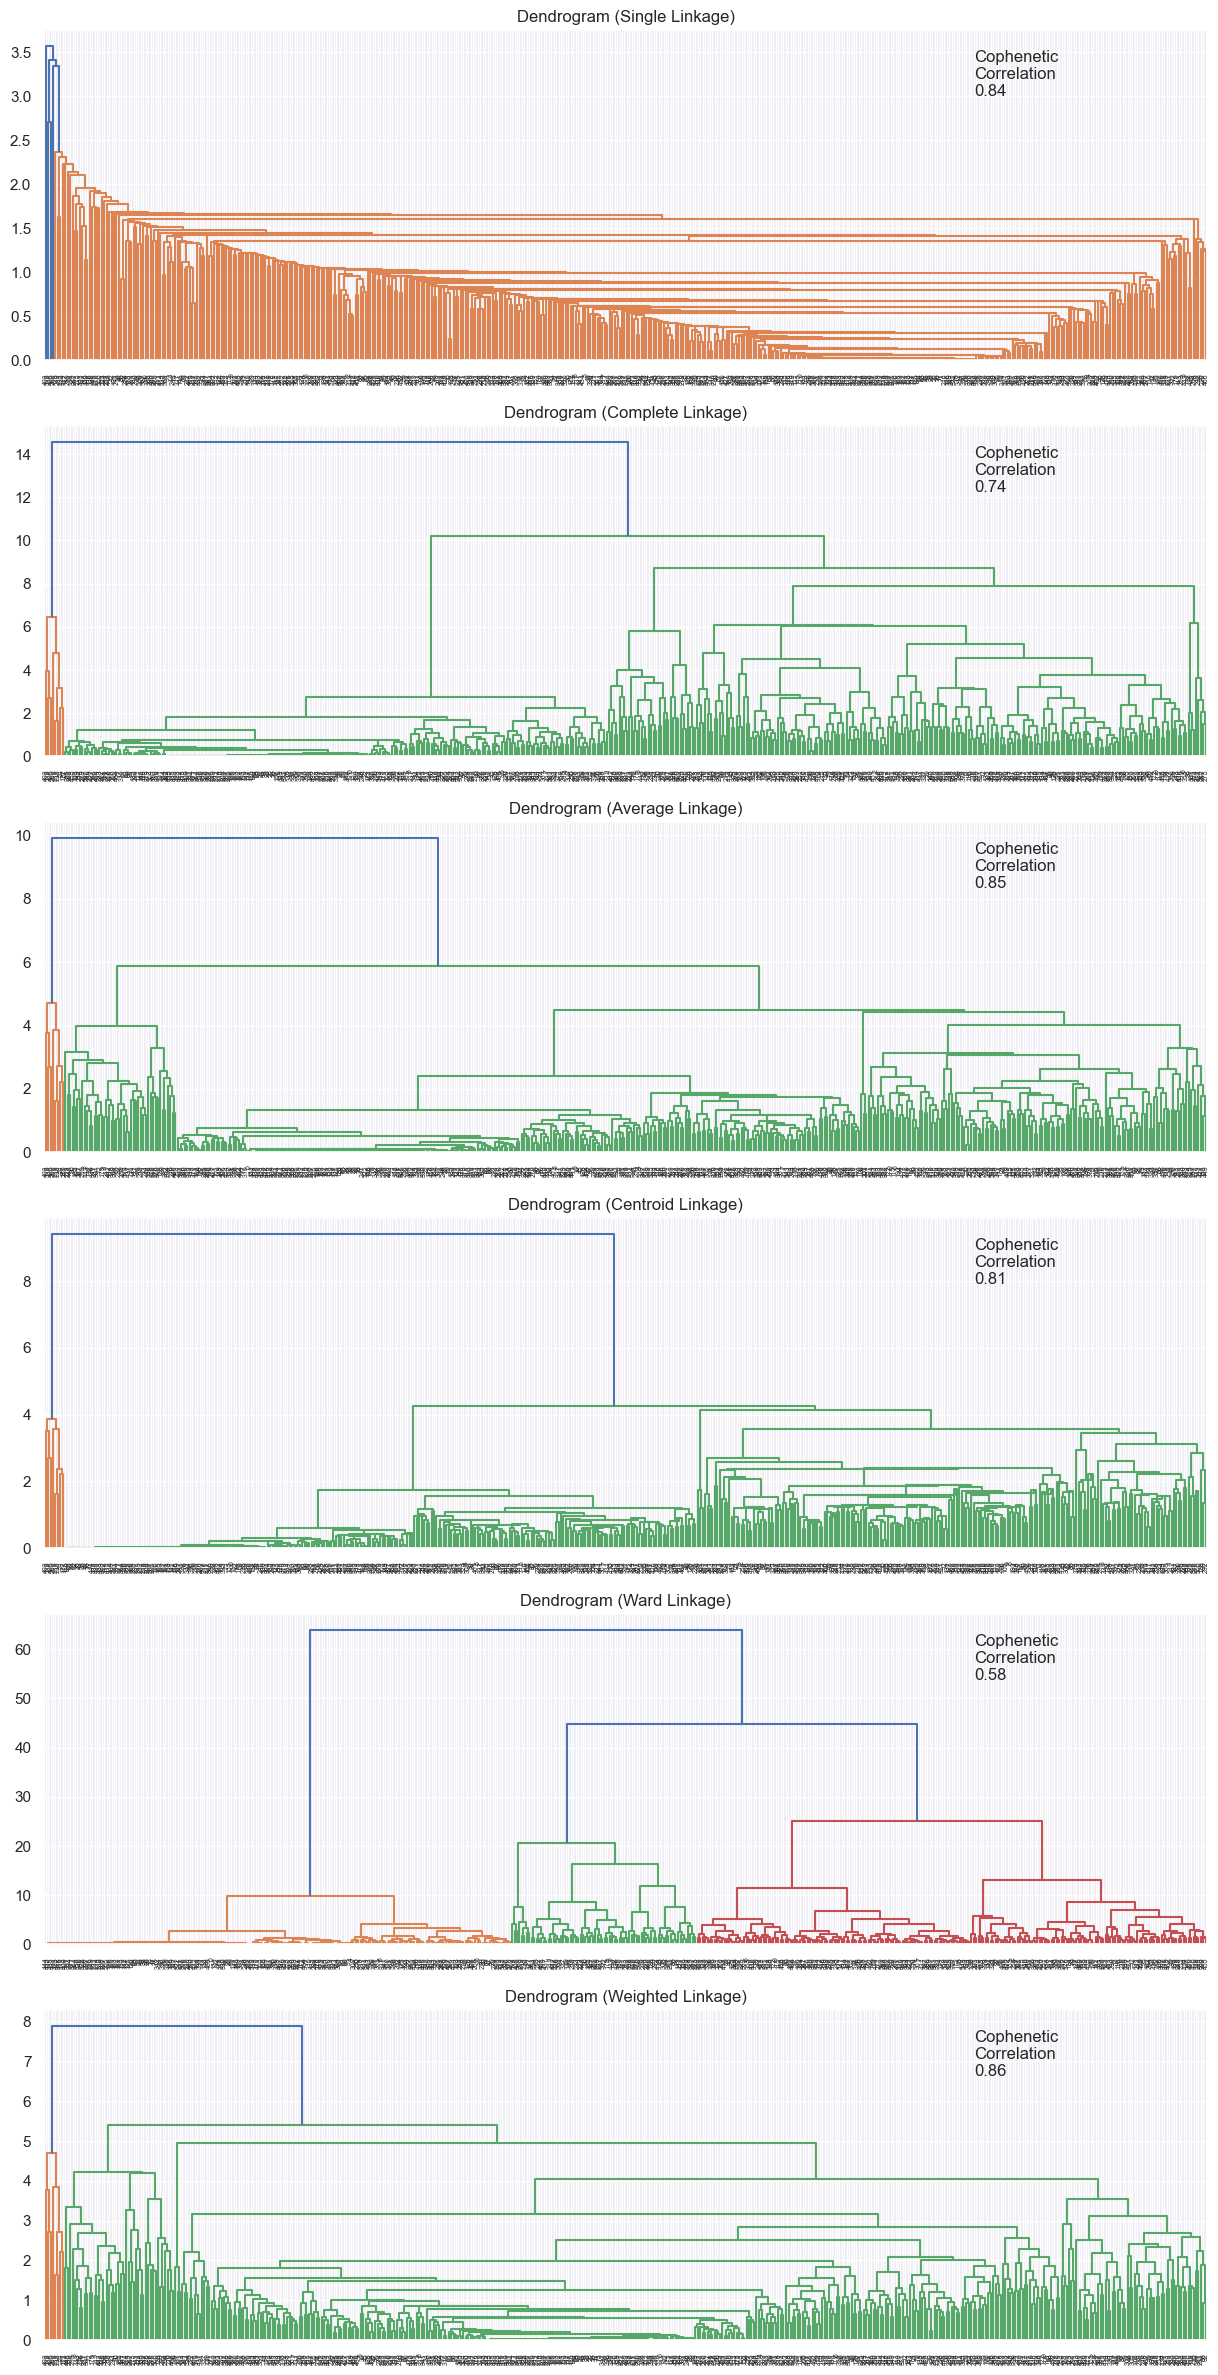

In [62]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [76]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


In [67]:
HCmodel = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average' )  # Complete the code to define the hierarchical clustering with average linkage
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [68]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling**

In [72]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean
cluster_means = df3.groupby('HC_segments').mean()

In [75]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_profile = df3.groupby("HC_segments").mean()
hc_profile["count_in_each_segment"] = hc_df["HC_segments"].value_counts().sort_index()

In [76]:
# Highlight the maximum average value among all the clusters for each of the variables

# Find the cluster-wise mean for each variable
cluster_means = df3.groupby("HC_segments").mean()

# Find the maximum mean value among all the clusters for each variable
max_means = cluster_means.max()

# Create a style function to highlight the maximum mean value for each variable
def highlight_max_mean(s):
    is_max = s == max_means[s.name]
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style function to the cluster-wise mean dataframe
cluster_means.style.apply(highlight_max_mean, axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
HC_segments,,,,,,,,,,
0,17.750000,10.625000,166.625000,3058.625000,41.375000,699.450000,995.825000,1480.250000,26.375000,11.500000
1,0.881517,1.139810,24.556872,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464
2,8.565217,5.826087,95.260870,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130


In [77]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature

# Define the number of clusters
num_clusters = HCmodel.n_clusters

# Print the players in each cluster
for i in range(num_clusters):
    print(f"Cluster {i+1}:")
    print(list(df3[df3['HC_segments'] == i]['Player_Name']))
    print("\n")

Cluster 1:
['Ollie Watkins', 'Dominic Calvert-Lewin', 'Patrick Bamford', 'Jamie Vardy', 'Mohamed Salah', 'Bruno Fernandes', 'Harry Kane', 'Heung-Min Son']


Cluster 2:
['Alex Runnarsson', 'Bernd Leno', 'Calum Chambers', 'Cedric Soares', 'Daniel Ceballos', 'David Luiz', 'Edward Nketiah', 'Emile Smith Rowe', 'Gabriel Maghalaes', 'Gabriel Teodoro Martinelli Silva', 'Granit Xhaka', 'Hector Bellerin', 'Kieran Tierney', 'Martin Odegaard', 'Matt Macey', 'Miguel Azeez', 'Mohamed Naser El Sayed Elneny', 'Pablo Mari', 'Reiss Nelson', 'Rob Holding', 'Sead Kolasinac', 'Shkodran Mustafi', 'Sokratis Papastathopoulos', 'Thomas Partey', 'William Saliba', 'Willian Borges Da Silva', 'Ahmed El Mohamady', 'Carney Chukwuemeka', 'Conor Hourihane', 'Douglas Luiz Soares de Paulo', 'Emiliano Martinez', 'Ezri Konsa Ngoyo', 'Henri Lansbury', 'Jacob Ramsey', 'Jaden Philogene-Bidace', 'John McGinn', 'Jose Peleteiro Romallo', 'Keinan Davis', 'Kortney Hause', 'Mahmoud Ahmed Ibrahim Hassan', 'Marvelous Nakamba', 'Mat

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [78]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  # Complete the code to define the hierarchical clustering with Ward Linkage
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [79]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling**

In [80]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean
ward_means = df3.groupby("HC_segments").mean()

ward_means

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
HC_segments,,,,,,,,,,
0,8.208333,6.361111,97.569444,2493.527778,34.375000,599.951389,647.577778,792.000000,14.972222,9.361111
1,1.357143,1.669643,29.544643,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500
2,1.336634,1.396040,49.524752,2535.762376,34.900990,230.948515,553.439604,194.702970,7.366337,9.663366
3,0.157068,0.251309,3.884817,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387


In [81]:
# Create the "count_in_each_segment" column in hierarchical cluster profile

# Calculate the count of players in each segment
hc_count = hc_df.groupby("HC_segments").count().iloc[:, 0]

# Create a hierarchical cluster profile with mean values of all columns
hc_profile = hc_df.groupby("HC_segments").mean()

# Add "count_in_each_segment" column to hierarchical cluster profile
hc_profile["count_in_each_segment"] = hc_count

In [82]:
# Highlight the maximum average value among all the clusters for each of the variables

hc_profile.style.highlight_max(axis=0)

,0,1,2,3,4,5,6,7,8,9,count_in_each_segment
HC_segments,,,,,,,,,,,
0,4.539954,1.162759,0.001980,0.011202,-0.077955,-0.067694,-0.022821,-0.037616,0.009355,-0.008845,72
1,-0.218928,-0.126114,0.126630,-0.250084,-0.013827,0.035062,0.035207,-0.020333,-0.031125,-0.001611,112
2,1.718715,-1.511246,-0.139497,0.087810,0.147482,0.000228,0.000658,0.016943,0.008363,-0.003694,101
3,-2.491869,0.434775,-0.001235,0.095990,-0.040494,0.004838,-0.012390,0.017144,0.010302,0.006232,191


In [83]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature

for i in range(num_clusters):
    print("Cluster ", i+1, ":", end="\n\n")
    print(df3[df3["HC_segments"] == i].Player_Name.values)
    print("\n")

Cluster  1 :

['Alexandre Lacazette' 'Bukayo Saka' 'Nicolas Pepe'
 'Pierre-Emerick Aubameyang' 'Anwar El Ghazi' 'Bertrand Traore'
 'Jack Grealish' 'John McGinn' 'Matt Targett' 'Ollie Watkins'
 'Danny Welbeck' 'Leandro Trossard' 'Neal Maupay' 'Pascal Gross'
 'Ashley Westwood' 'Chris Wood' 'Dwight McNeil' 'Mason Mount'
 'Timo Werner' 'Christian Benteke' 'Eberechi Eze' 'Wilfried Zaha'
 'Dominic Calvert-Lewin' 'Gylfi Sigurdsson' 'Lucas Digne'
 'Richarlison de Andrade' 'Jack Harrison' 'Patrick Bamford'
 'Raphael Dias Belloli' 'Rodrigo Moreno' 'Stuart Dallas' 'Harvey Barnes'
 'James Maddison' 'Jamie Vardy' 'Kelechi Iheanacho' 'Youri Tielemans'
 'Andrew Robertson' 'Diogo Jota' 'Mohamed Salah' 'Roberto Firmino'
 'Sadio Mane' 'Trent Alexander-Arnold' 'Gabriel Fernando de Jesus'
 'Ilkay Gundogan' 'Kevin De Bruyne' 'Phil Foden' 'Raheem Sterling'
 'Riyad Mahrez' 'Aaron Wan-Bissaka' 'Bruno Fernandes' 'Edinson Cavani'
 'Luke Shaw' 'Marcus Rashford' 'Mason Greenwood' 'Callum Wilson'
 'Joseph Willock'

**Let's plot the boxplot**

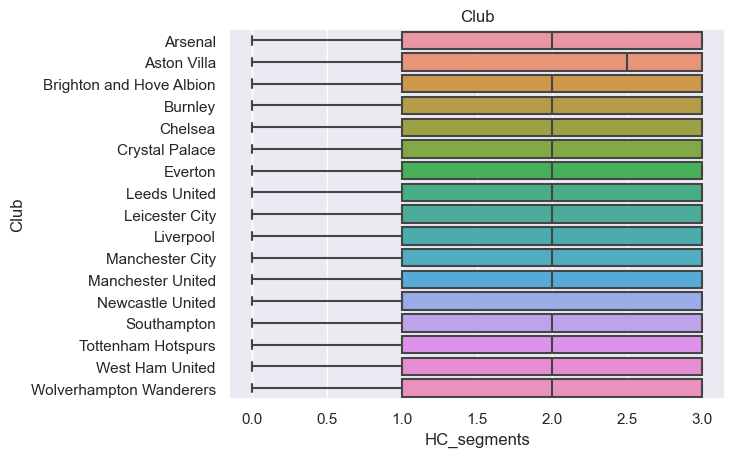

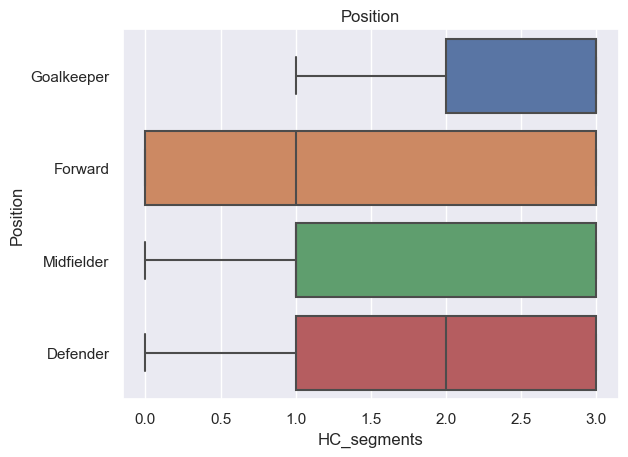

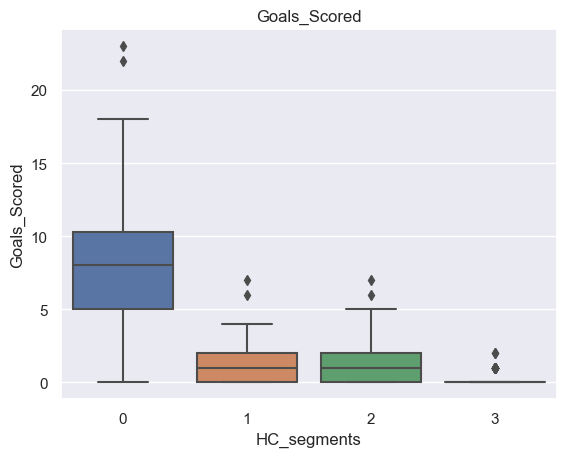

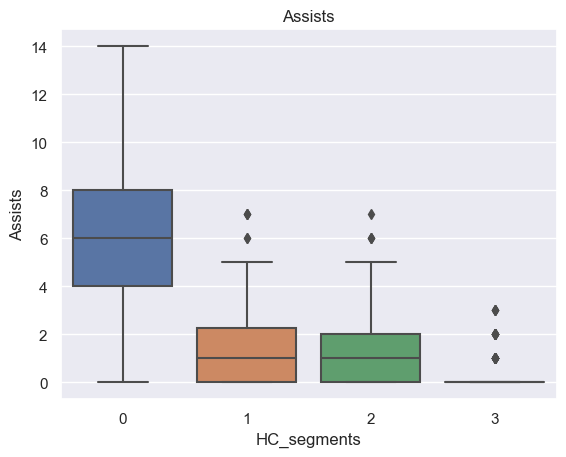

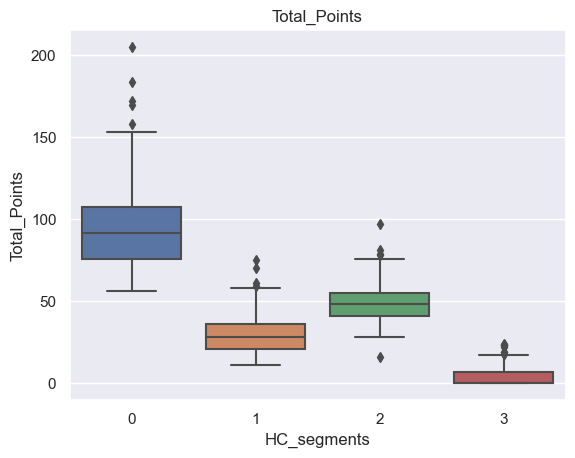

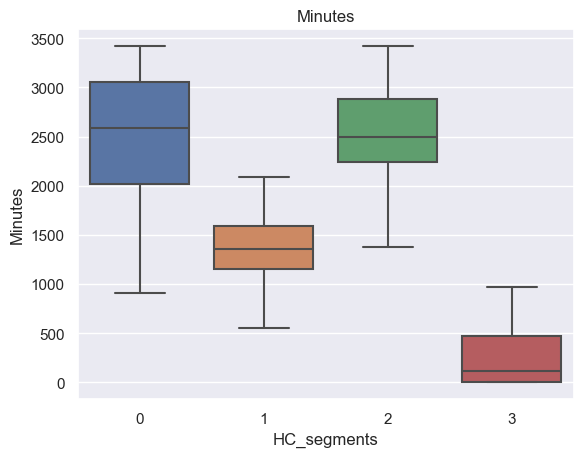

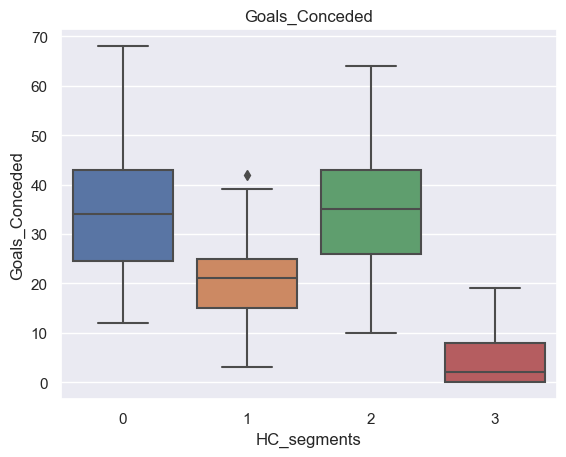

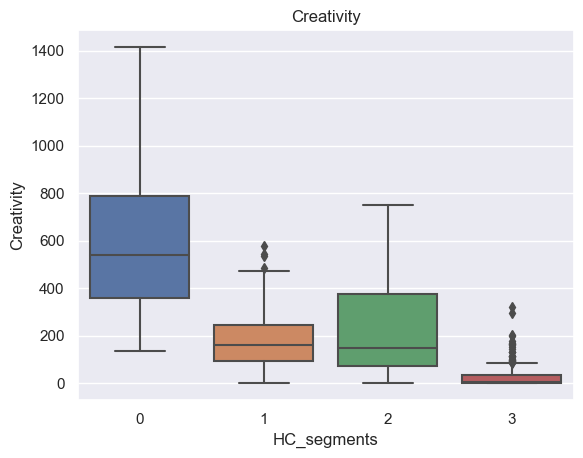

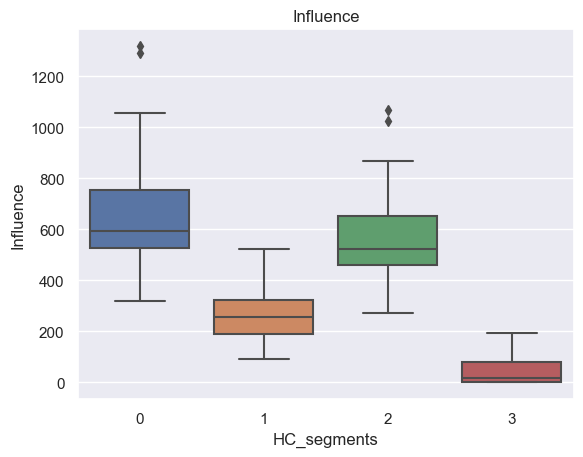

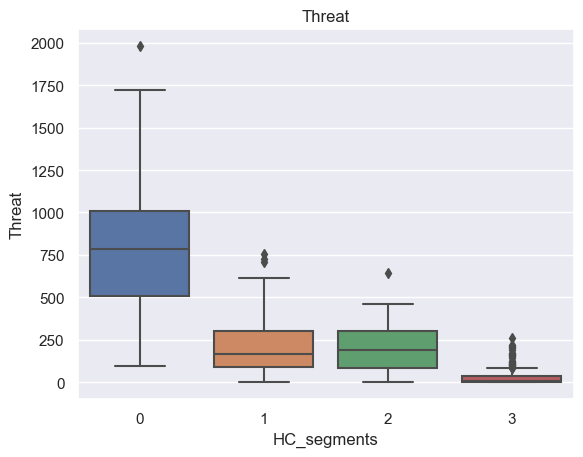

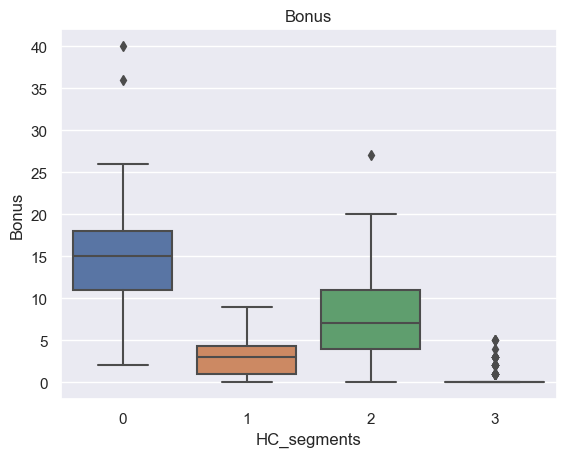

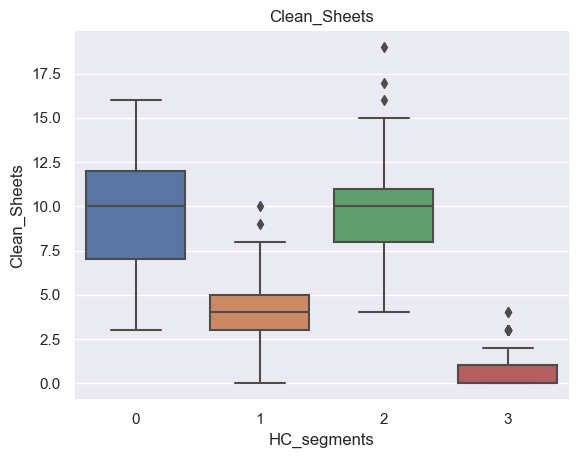

In [84]:
# Create boxplot for each of the variables

# Create boxplots for each variable
for column in df.columns[1:]:
    sns.boxplot(x='HC_segments', y=column, data=df3)
    plt.title(column)
    plt.show()

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from Hierarchical and previous algorithms:___________________**


## **GMM clustering**

In [108]:
gmm_df = data_pca.copy()

In [112]:
gmm = GaussianMixture(n_components=4, random_state = 10) # Initializing the Gaussian Mixture algorithm with n_components = 4
gmm.fit(gmm_df) # Fit the Gaussian Mixture algorithm on the gmm_df

GaussianMixture(n_components=4, random_state=10)

### **Cluster Profiling**

In [113]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(gmm_df)

In [117]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df4' by cluster labels column and then find mean
cluster_means = df4.groupby('GMM_segments').mean()

In [121]:
# Create the "count_in_each_segment" column in gmm cluster profile

segment_counts = df4['GMM_segments'].value_counts().sort_index()
data_pca['count_in_each_segment'] = [segment_counts[i] for i in df4['GMM_segments']]

In [131]:
# Highlight the maximum average value among all the clusters for each of the variables

# Agrupar por segmentos GMM y calcular la media de cada grupo
gmm_means = df4.groupby('GMM_segments').mean()

# Encontrar el valor máximo para cada variable
max_vals = gmm_means.max()

# Crear una nueva fila en el DataFrame con los valores máximos
max_row = ["Max Value"] + list(max_vals)
gmm_max = gmm_means.append(pd.Series(max_row, name=''))

# Mostrar el DataFrame resultante
print(gmm_max)

              Goals_Scored   Assists  Total_Points      Minutes  \
GMM_segments                                                      
0                 0.000000  0.000000      1.130435   135.014493   
1                 0.166667  0.500000     59.666667  3023.500000   
3                 2.731928  2.503012     46.879518  1806.012048   
                       NaN       NaN           NaN          NaN   

              Goals_Conceded  Creativity   Influence      Threat      Bonus  \
GMM_segments                                                                  
0                   2.413043    9.490580   20.875362    8.050725   0.101449   
1                  37.500000  145.783333  749.133333   85.666667  12.000000   
3                  25.786145  274.398193  400.187952  317.641566   6.506024   
                         NaN         NaN         NaN         NaN        NaN   

              Clean_Sheets          0         1         2          3       4  \
GMM_segments                              

In [136]:
# Complete the code to print the players in each cluster. Hint: Use the GMM_segments feature

# Agrupar los jugadores por segmento GMM
gmm_groups = df4.groupby('GMM_segments')

# Iterar a través de cada grupo e imprimir los nombres de los jugadores
for name, group in gmm_groups:
    print("GMM Segment:", name)
    player_names = group['Player_Name'].sort_values().str.cat(sep=", ")
    print(player_names)
    print("\n")

GMM Segment: 0
Adam Forshaw, Ademipo Odubeko, Adrian Castillo, Albian Ajeti, Alex Runnarsson, Andi Zeqiri, Anthony Driscoll-Glennon, Anthony Gordon, Axel Tuanzebe, Bailey Peacock-Farrell, Bernardo Fernandes da Silva Junior, Billy Gilmour, Brandon Williams, Caleb Watts, Cameron Carter-Vickers, Caoimhin Kelleher, Carney Chukwuemeka, Cenk Tosun, Christian Fuchs, Connor Wickham, Dale Stephens, Dane Scarlett, Daniel N'Lundulu, Danny Rose, Darren Randolph, Davy Propper, DeAndre Yedlin, Demarai Gray, Divock Origi, Elliot Anderson, Emerson Palmieri dos Santos, Eric Garcia, Fabian Delph, Faustino Anjorin, Felipe Anderson Pereira Gomes, Fernando Marcal, Fikayo Tomori, Filip Benkovic, Florian Lejeune, Francisco Casilla, Frederik Alves, Gaetano Berardi, Hamza Choudhury, Hannibal Mejbri, Harry Winks, Henri Lansbury, Ian Carlo Poveda-Ocampo, Islam Slimani, Jack Butland, Jack Jenkins, Jaden Philogene-Bidace, Jake Vokins, Jamal Baptiste, James McCarthy, James Tomkins, Jamie Shackleton, Japhet Tanganga

**Let's plot the boxplot**

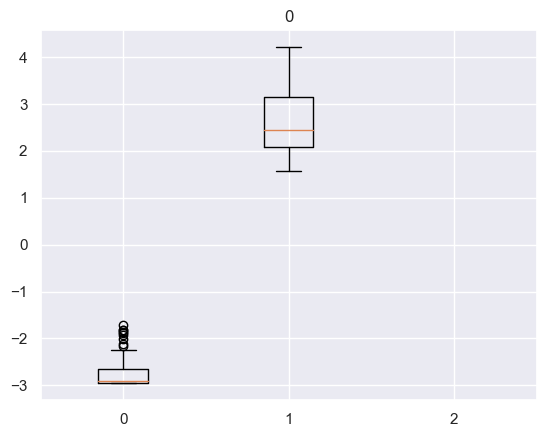

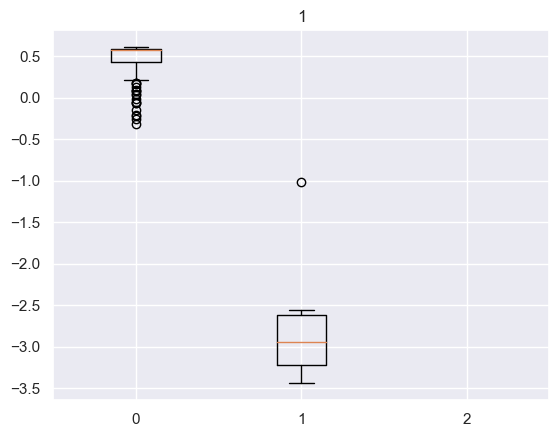

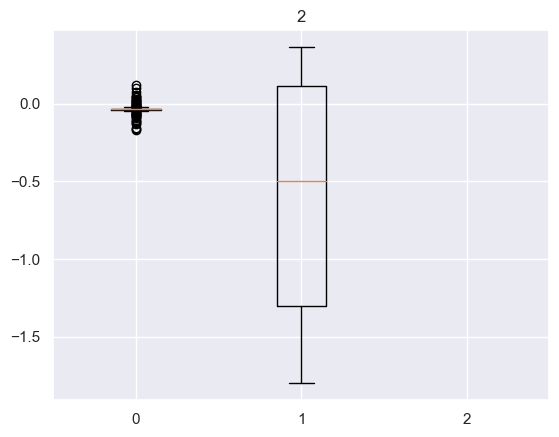

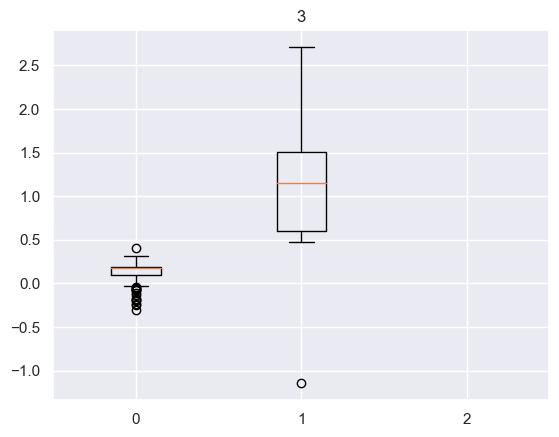

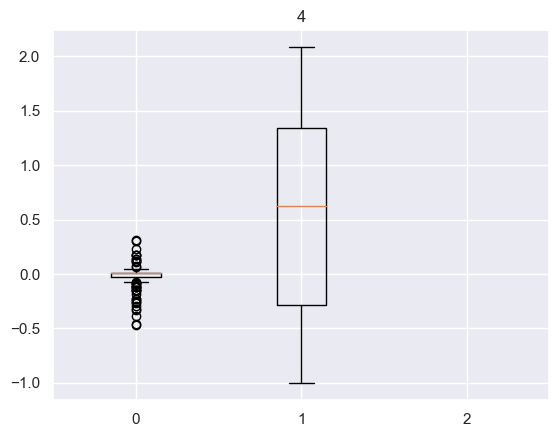

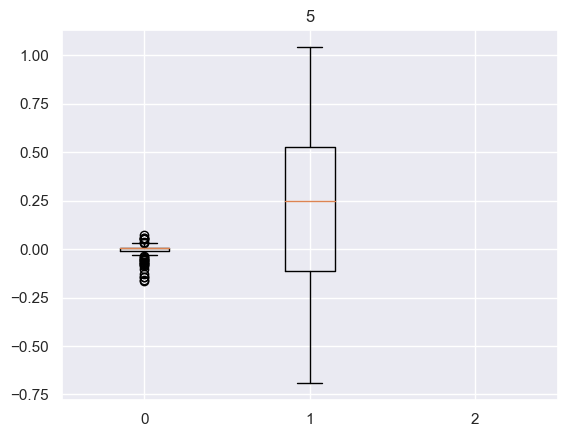

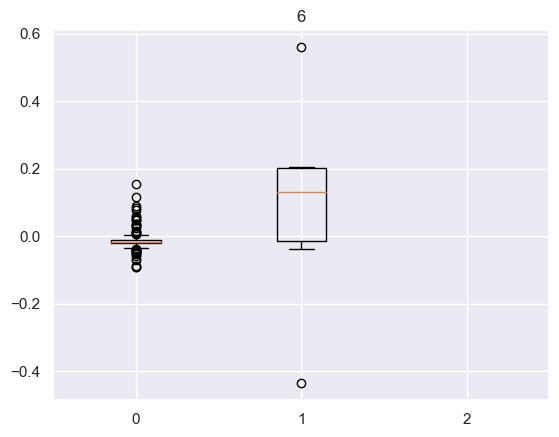

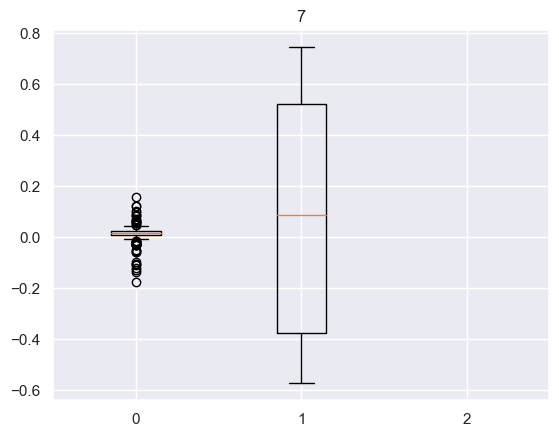

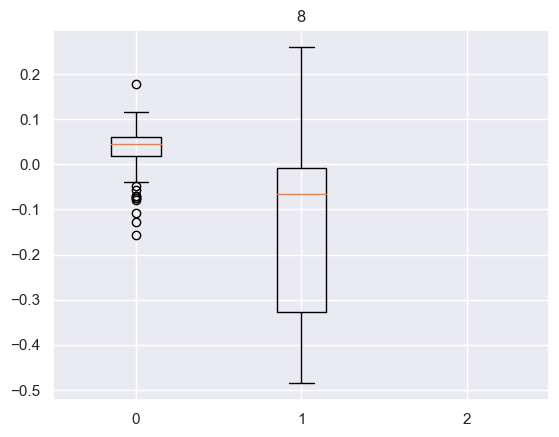

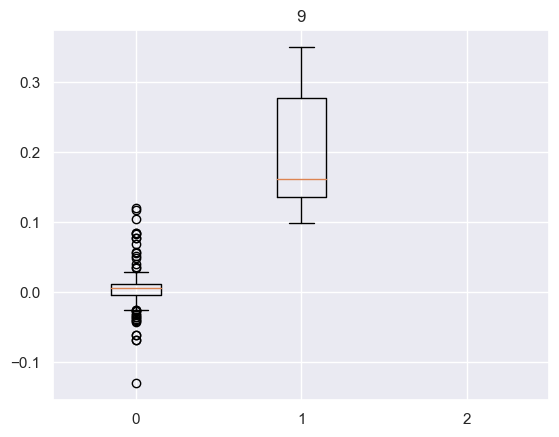

In [144]:
# Create boxplot for each of the variables

num_segments = len(df4['GMM_segments'].unique())
# Separar los datos por segmento GMM
segment_data = [data_pca.loc[df4['GMM_segments'] == segment] for segment in range(num_segments)]

# Crear un diagrama de caja para cada variable
for i, col in enumerate(segment_data[0].columns[:-1]):
    fig, ax = plt.subplots()
    ax.boxplot([segment[col] for segment in segment_data])
    ax.set_xticklabels(range(num_segments))
    ax.set_title(col)
    plt.show()

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from GMM and previous algorithms:
Las características de los clusters varían entre los algoritmos. Por ejemplo, en el algoritmo de k-means se observan clusters más dispersos en comparación con GMM, donde los clusters son más compactos. También se observa que el algoritmo de aglomeración jerárquica produce clusters con características intermedias entre k-means y GMM.

En general, se puede concluir que cada algoritmo tiene sus propias fortalezas y debilidades en la asignación de clusters y en la definición de sus perfiles. Por lo tanto, es importante elegir el algoritmo adecuado para los datos y el objetivo específico del análisis.**

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [145]:
dbscan_df = data_pca.copy()

In [146]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [147]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.8590373631333302
For eps value =2 For min sample =20 The average silhoutte_score is : 0.4216964145198529
For eps value =3 For min sample =6 The average silhoutte_score is : 0.950018642593748
For eps value =3 For min sample =20 The average silhoutte_score is : 0.9441401955772859


In [148]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [149]:
# Applying DBSCAN with the hyperparmeter values that we got
# Fit DBSCAN algorithm with the above hyperparameter values

dbscan = DBSCAN(eps=high_i_j[0], min_samples=high_i_j[1])
dbscan_labels = dbscan.fit_predict(dbscan_df)

In [150]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df["db_segments"] = dbscan_labels

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  dbscan_labels

### **Cluster Profiling**

In [151]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df5' by cluster labels column and then find mean
cluster_means = df5.groupby('db_segments').mean()

In [152]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
counts = df5['db_segments'].value_counts()
cluster_means['count_in_each_segment'] = counts

In [153]:
# Highlight the maximum average value among all the clusters for each of the variables
def highlight_max(s):
    '''
    resalta el máximo en amarillo en una serie.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

cluster_means.style.apply(highlight_max, axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,9.416667,6.083333,116.333333,3034.250000,39.250000,462.658333,908.350000,766.333333,20.333333,12.750000,12
0,0.000000,0.000000,1.130435,135.014493,2.413043,9.490580,20.875362,8.050725,0.101449,0.282609,138
1,2.438650,2.334356,44.558282,1783.208589,25.506135,265.101227,387.904908,296.855828,6.098160,6.340491,326


**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

Sí, se pueden probar más valores para eps y min_samples. Sin embargo, es importante tener en cuenta que probar demasiados valores puede llevar mucho tiempo y puede hacer que el proceso sea computacionalmente costoso. También es importante tener en cuenta que encontrar la combinación óptima de eps y min_samples no garantiza necesariamente que el modelo resultante sea el mejor para todos los casos.

**Observations and Insights:**

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)        # Initializing K-Means with number of clusters as 4 and random_state = 1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)         

In [ ]:
# Initialize K-Medoids with number of clusters as 4 and random_state = 1

# Fitting and predicting K-Medoids on data_pca

# Calculate the silhouette score

# Print the score 

In [ ]:
# Initialize Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4

# Fitting and predicting HC algorithm on data_pca  

# Calculate the silhouette score

# Print the score 

In [ ]:
# Initialize Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1

# Fitting and predicting Gaussian Mixture algorithm on data_pca

# Calculate the silhouette score

# Print the score 

**Think about it:**

- Which is the best algorithm here among all the algorithms?

## **Conclusion:**__


## **Recommendations:**__